In [1]:
#importing essential scripts for data analysis
import pandas as pd
import numpy as np
from data_manipulations import DataTransform
from data_manipulations import DataFrameInfo
from data_manipulations import Plotter
from data_manipulations import DataFrameTransform



In [2]:
#Loan payments csv file path 
file_path = 'loan_payments.csv'

#obtaining the dataframe from the csv file
loan_df = pd.read_csv(file_path)

# Set to display all columns
pd.set_option('display.max_columns', None)  


In [3]:
#the view of dataframe in form it is obtained from AI Core online repository
loan_df

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      38676116   41461848         8000         8000.0             8000.0   
1      38656203   41440010        13200        13200.0            13200.0   
2      38656154   41439961        16000        16000.0            16000.0   
3      38656128   41439934        15000        15000.0            15000.0   
4      38656121   41439927        15000        15000.0            15000.0   
...         ...        ...          ...            ...                ...   
54226     76597      76583         5000         5000.0             1775.0   
54227    142608      74724         5000         5000.0             2350.0   
54228    117045      70978         3500         3500.0             2225.0   
54229     88854      70699         5000         5000.0              225.0   
54230     72323      70694         5000         5000.0              350.0   

            term  int_rate  instalment grade sub_grade employment_length  \
0      36 months      7.49      248.82     A        A4           5 years   
1      36 months      6.99      407.52     A        A3           9 years   
2      36 months      7.49      497.63     A        A4           8 years   
3      36 months     14.31      514.93     C        C4            1 year   
4      36 months      6.03      456.54     A        A1         10+ years   
...          ...       ...         ...   ...       ...               ...   
54226  36 months      9.01      159.03     B        B2            1 year   
54227  36 months     10.59      162.73     C        C2          < 1 year   
54228  36 months      7.43      108.77     A        A2         10+ years   
54229  36 months      7.43      155.38     A        A2           4 years   
54230  36 months     11.54      164.98     C        C5           9 years   

      home_ownership  annual_inc verification_status issue_date  \
0           MORTGAGE     46000.0        Not Verified   Jan-2021   
1               RENT     50000.0        Not Verified   Jan-2021   
2           MORTGAGE     73913.0     Source Verified   Jan-2021   
3               RENT     42000.0     Source Verified   Jan-2021   
4           MORTGAGE    145000.0            Verified   Jan-2021   
...              ...         ...                 ...        ...   
54226       MORTGAGE    250000.0        Not Verified   Jul-2013   
54227           RENT     15000.0        Not Verified   Oct-2013   
54228       MORTGAGE    300000.0        Not Verified   Aug-2013   
54229           RENT    200000.0        Not Verified   Aug-2013   
54230       MORTGAGE     55000.0        Not Verified   Jul-2013   

                                             loan_status payment_plan  \
0                                                Current            n   
1                                                Current            n   
2                                             Fully Paid            n   
3                                             Fully Paid            n   
4                                                Current            n   
...                                                  ...          ...   
54226                                         Fully Paid            n   
54227                                         Fully Paid            n   
54228  Does not meet the credit policy. Status:Fully ...            n   
54229                                         Fully Paid            n   
54230  Does not meet the credit policy. Status:Charge...            n   

                  purpose    dti  delinq_2yrs earliest_credit_line  \
0             credit_card  19.54            2             Oct-1987   
1             credit_card  24.20            0             Sep-2001   
2             credit_card  16.92            0             Sep-1998   
3      debt_consolidation  35.52            0             Jun-2008   
4      debt_consolidation   3.33            0             Apr-2002   
...                   ...    ...          ...                  ...   
542

In [4]:
#Transforming the term and employment length columns in to an integer representation (null values preserved)

#instance of data tansfer class
transformation_instance=DataTransform(loan_df)

#getting a version of dataframe with the transformed columns
data_df=transformation_instance.column_conversions()


In [5]:
#Verifying if the structure of the new dataframe is correct.

#Make sure that when displaying the dataframe all columns are displayed
pd.set_option('display.width', 1000)      

#printing the dataframe
print(data_df)

             id  member_id  loan_amount  funded_amount  funded_amount_inv  term  int_rate  instalment grade sub_grade  employment_length home_ownership  annual_inc verification_status issue_date                                        loan_status payment_plan             purpose    dti  delinq_2yrs earliest_credit_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_accounts  total_accounts  out_prncp  out_prncp_inv  total_payment  total_payment_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_payment_date  last_payment_amount next_payment_date last_credit_pull_date  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type
0      38676116   41461848         8000         8000.0             8000.0    36      7.49      248.82     A        A4                5.0       MORTGAGE     46000.0        Not Verified   Jan-2021                                            Current            n         cre

In [6]:
#obtaining statistical parameters describing the nature of numerical columns
data_df.describe()

id     member_id   loan_amount  funded_amount  funded_amount_inv       term      int_rate    instalment  employment_length    annual_inc           dti   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_accounts  total_accounts     out_prncp  out_prncp_inv  total_payment  total_payment_inv  total_rec_prncp  total_rec_int  total_rec_late_fee    recoveries  collection_recovery_fee  last_payment_amount  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code
count  5.423100e+04  5.423100e+04  54231.000000   51224.000000       54231.000000    49459.0  49062.000000  54231.000000       52113.000000  5.423100e+04  54231.000000  54231.000000    54231.000000             23229.00000             6181.000000   54231.000000    54231.000000  54231.000000   54231.000000   54231.000000       54231.000000     54231.000000   54231.000000        54231.000000  54231.000000             54231.000000         54231.000000                54180.000000                  7499.000000      54231.0
mean   7.621797e+06  8.655350e+06  13333.076100   13229.509117       12952.622979  42.606199     13.507328    400.013953           5.787347  7.222085e+04     15.867087      0.241799        0.893843                34.01920               74.829154      10.559809       24.168206   2753.964172    2752.568147   12079.208480       11788.946618      9407.048589    2577.757101            0.901512     93.501288                10.859057          3130.706393                    0.004208                    42.253634          1.0
std    9.571362e+06  1.031281e+07   8082.196709    8019.017599        8099.473527  10.719573      4.392893    238.920012           3.508065  5.158934e+04      7.623124      0.706706        1.261421                21.92324               36.137264       4.797169       11.587025   5154.893646    5153.043643    8391.043845        8363.508506      6958.124264    2581.657345            6.215792    630.843636               120.193950          5323.801675                    0.070990                    21.052360          0.0
min    5.552100e+04  7.069400e+04    500.000000     500.000000           0.000000       36.0      5.420000     15.670000           1.000000  3.300000e+03      0.000000      0.000000        0.000000                 0.00000                0.000000       1.000000        1.000000      0.000000       0.000000       0.000000           0.000000         0.000000       0.000000            0.000000      0.000000                 0.000000             0.000000                    0.000000                     0.000000          1.0
25%    7.594330e+05  9.587720e+05   7000.000000    7000.000000        6700.000000       36.0     10.370000    224.205000           2.000000  4.500000e+04     10.200000      0.000000        0.000000                15.00000               53.000000       7.000000       16.000000      0.000000       0.000000    5895.210000        5658.815000      4264.350000     889.560000            0.000000      0.000000                 0.000000           289.790000                    0.000000                    26.000000          1.0
50%    7.084590e+06  8.709873e+06  12000.000000   12000.000000       11300.000000       36.0     13.160000    347.150000           6.000000  6.100000e+04     15.600000      0.000000        1.000000                31.00000               87.000000      10.000000       23.000000      0.000000       0.000000   10113.250000        9835.830000      7644.920000    1734.640000            0.000000      0.000000                 0.000000           562.670000                    0.000000                    42.000000          1.0
75%    8.860616e+06  1.052714e+07  18000.000000   18000.000000       18000.000000       60.0     16.200000    527.550000          10.000000  8.600000e+04     21.260000      0.000000        1.000000                49.00000              103.000000      13.000000       31.000000   3397.325000    3394.980000   16272.895000       15978.200000     12505.625000    332

In [7]:
#printing data types for each column
print(data_df.dtypes)

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                             Int64
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length              float64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

In [8]:
# Rows number, Columns Number
rows,cols=data_df.shape
print(f'Number of rows is: {rows}, columns: {cols}')


Number of rows is: 54231, columns: 43


In [9]:
#For Categorical Columns counting the distinct values

# Select only categorical columns (dtype: object)
categorical_columns = data_df.select_dtypes(include='object')

# Count distinct values in each categorical column
distinct_counts = categorical_columns.nunique()

# Display the result
print(distinct_counts)


grade                      7
sub_grade                 35
home_ownership             5
verification_status        3
issue_date                61
loan_status                9
payment_plan               2
purpose                   14
earliest_credit_line     587
last_payment_date         98
next_payment_date         96
last_credit_pull_date    101
application_type           1
dtype: int64


In [10]:
#intialising instance of the class to obtain the missing_percentage a number of missing values in each column
info=DataFrameInfo(data_df)

# Set to display all columns
pd.set_option('display.max_columns', None)  

#display info by calling method
info.column_statistics()


Column: id
Missing Percentage: 0.00%, Missing Value Count: 0
Normality Test - Statistics=25327.749, p=0.000
The data does not appear to follow a normal distribution (reject H0).

Column: member_id
Missing Percentage: 0.00%, Missing Value Count: 0
Normality Test - Statistics=23353.917, p=0.000
The data does not appear to follow a normal distribution (reject H0).

Column: loan_amount
Missing Percentage: 0.00%, Missing Value Count: 0
Normality Test - Statistics=4586.019, p=0.000
The data does not appear to follow a normal distribution (reject H0).

Column: funded_amount
Missing Percentage: 5.54%, Missing Value Count: 3007
Normality Test - Statistics=4491.436, p=0.000
The data does not appear to follow a normal distribution (reject H0).

Column: funded_amount_inv
Missing Percentage: 0.00%, Missing Value Count: 0
Normality Test - Statistics=4685.476, p=0.000
The data does not appear to follow a normal distribution (reject H0).

Column: term
Missing Percentage: 8.80%, Missing Value Count: 4

c:\Users\micha\.conda\envs\work_env\Lib\site-packages\scipy\stats\_stats_py.py:1584: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
c:\Users\micha\.conda\envs\work_env\Lib\site-packages\scipy\stats\_stats_py.py:1786: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


### Columns with High Missing Percentage
Looking at the missing percentage of values in columns it is zero or close to zero for most columns and less 10% except for all columns except "mths_since_last_delinq", "mths_since_last_record", "next_payment_date" and "mths_since_last_major_derog". The 4 columns have more then 50% missing data values, hence I will be dropping those variables, as imputations risks making up too much erronous data.

### Categorical Columns with Null Values
There are two categorical columns with null values left which contain 80 null values across them. Entire rows will be dropped from the dataframe where last_payment_date and last_credit_pull_date have null values. Given there is over 50000 rows in dataframe dropping 80 will be of no-consequence, but imputing dataes might not have been the right approach due their inherent variability. 

### Numeric Columns with Null Values
Remaining columns missing values are numeric. They will be imputed with median. Median was chosen rather then mean as according to D'Agostino's K^2 Test no numeric columns follow normal distribution making median a more effective measure of central tendency. 


For further confirmation that no variables follow normal distribtuion historgrams and q-qplots have been plotted. 

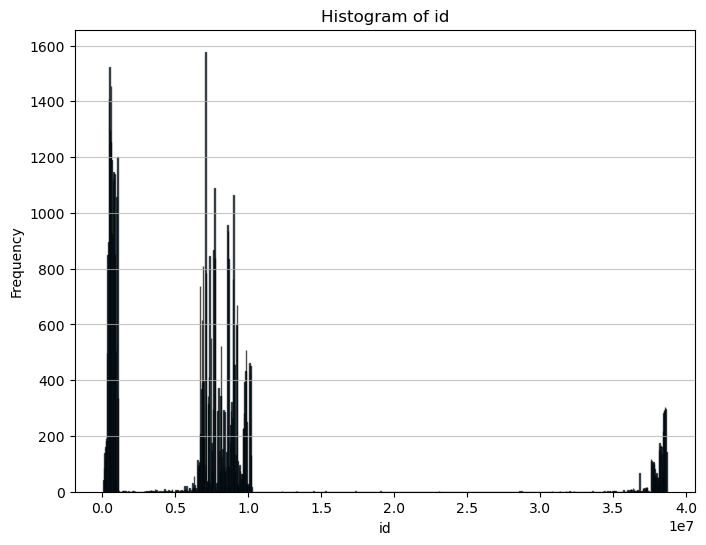

The skew of id column is 2.370336021094686


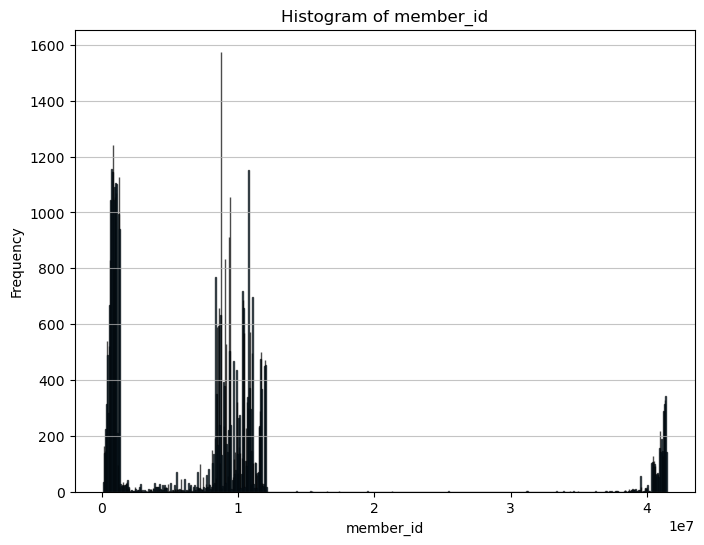

The skew of member_id column is 2.205422084785879


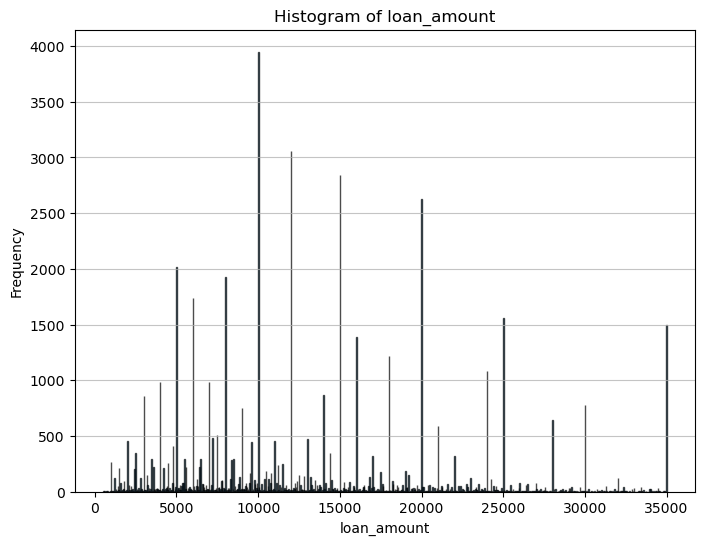

The skew of loan_amount column is 0.8052592257800115


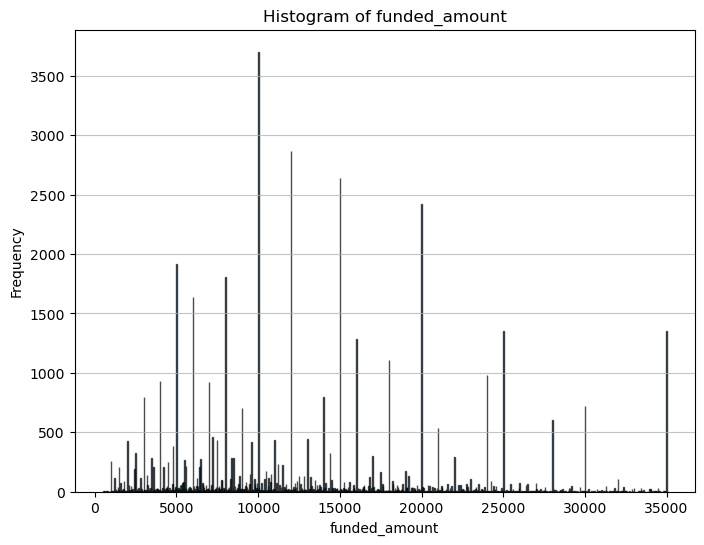

The skew of funded_amount column is 0.8217873460284143


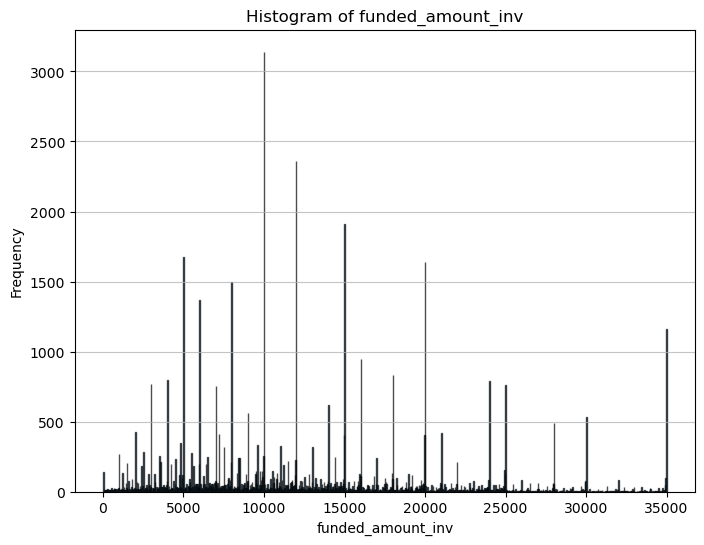

The skew of funded_amount_inv column is 0.8139274222318484


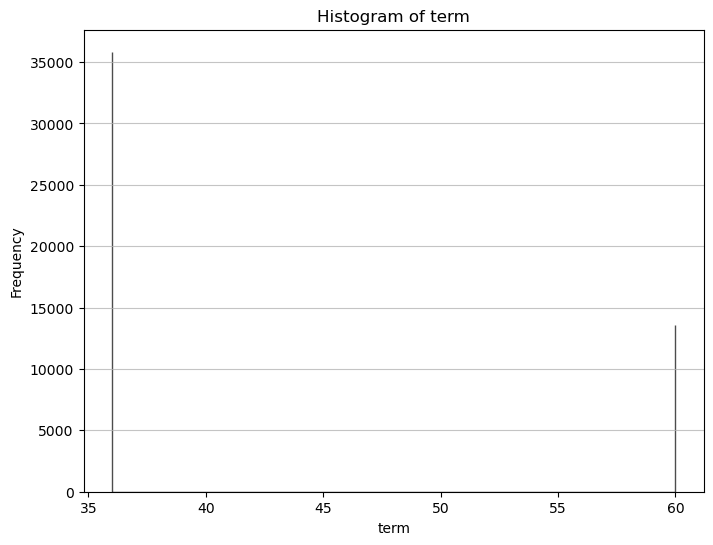

The skew of term column is 1.0063869691734089


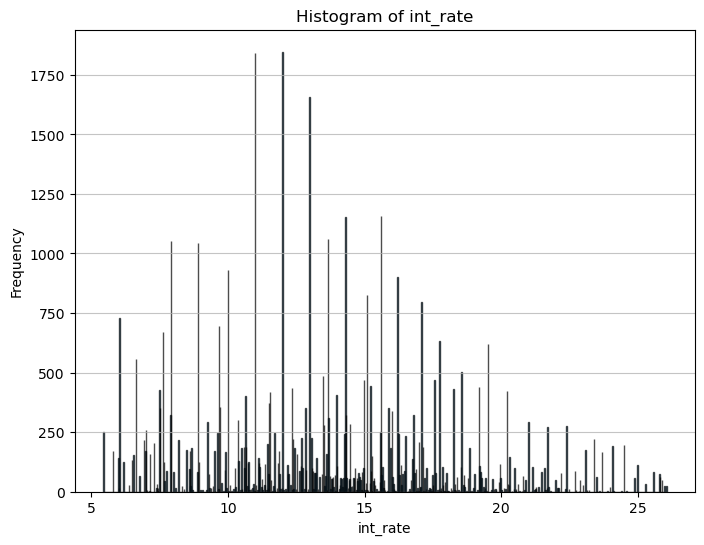

The skew of int_rate column is 0.41203240981473305


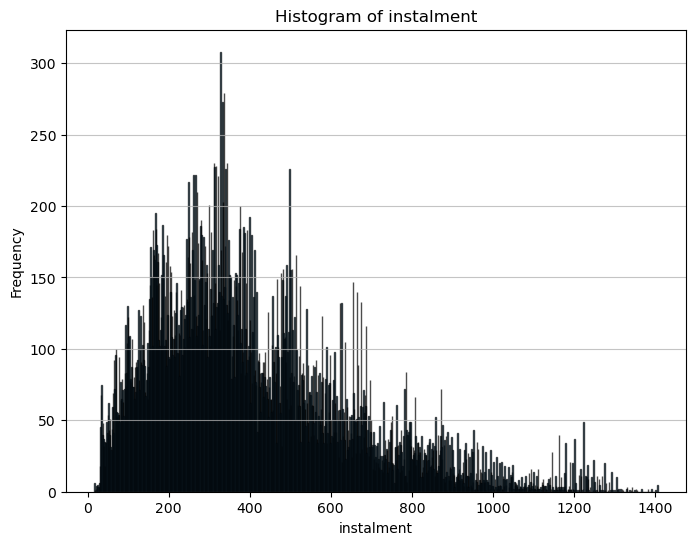

The skew of instalment column is 0.9969813991920319
Skipping non-numeric column: grade
Skipping non-numeric column: sub_grade


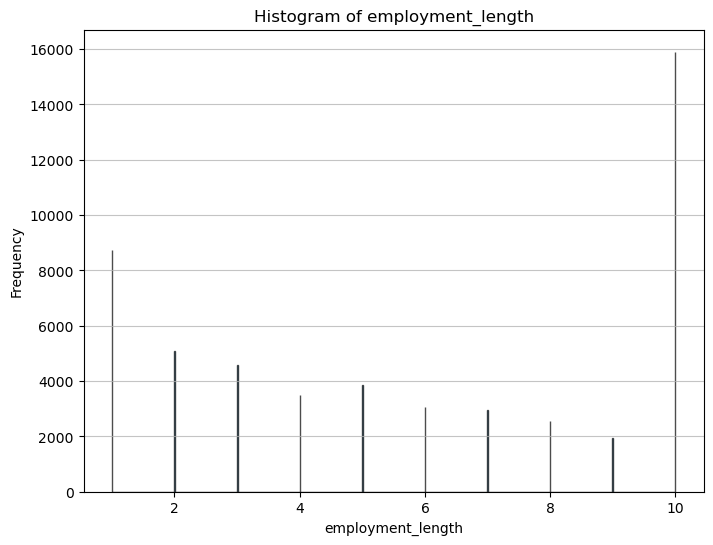

The skew of employment_length column is -0.030887781130908728
Skipping non-numeric column: home_ownership


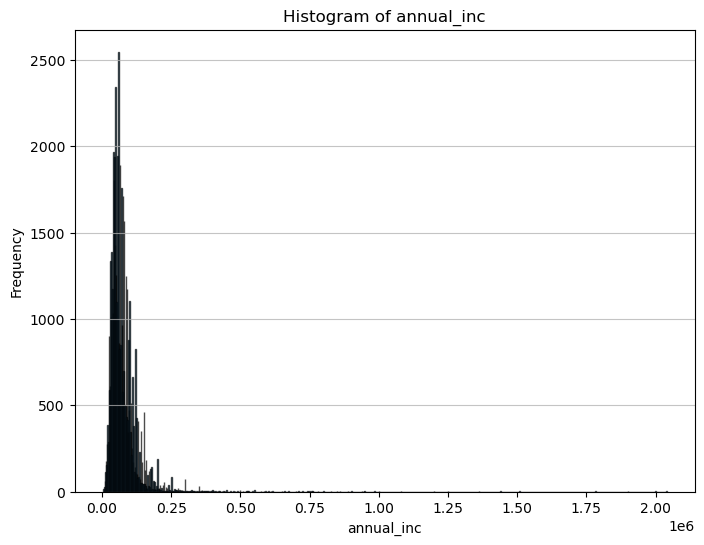

The skew of annual_inc column is 8.711831033809583
Skipping non-numeric column: verification_status
Skipping non-numeric column: issue_date
Skipping non-numeric column: loan_status
Skipping non-numeric column: payment_plan
Skipping non-numeric column: purpose


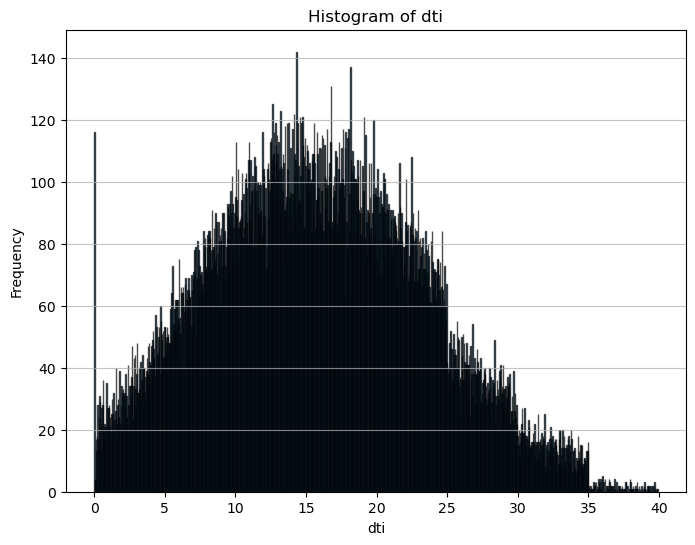

The skew of dti column is 0.18941964982496076


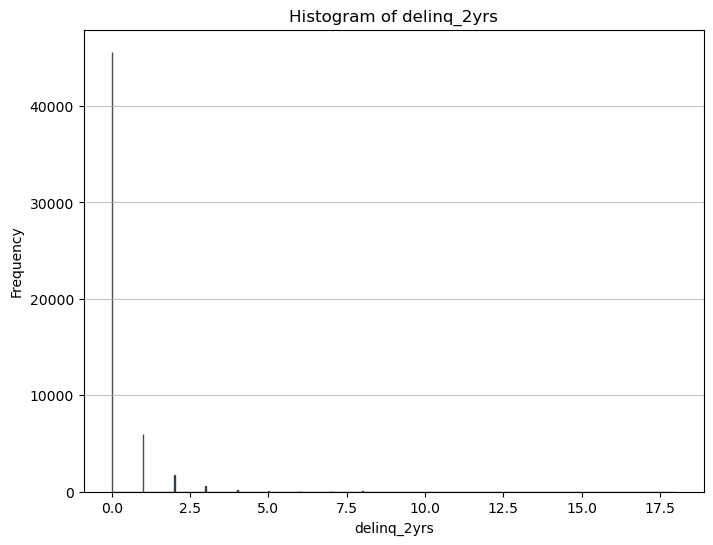

The skew of delinq_2yrs column is 5.370001885877136
Skipping non-numeric column: earliest_credit_line


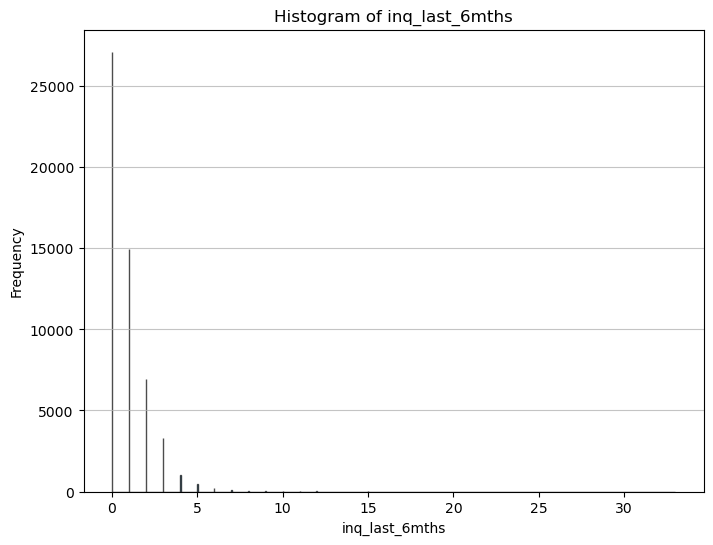

The skew of inq_last_6mths column is 3.248918364007299


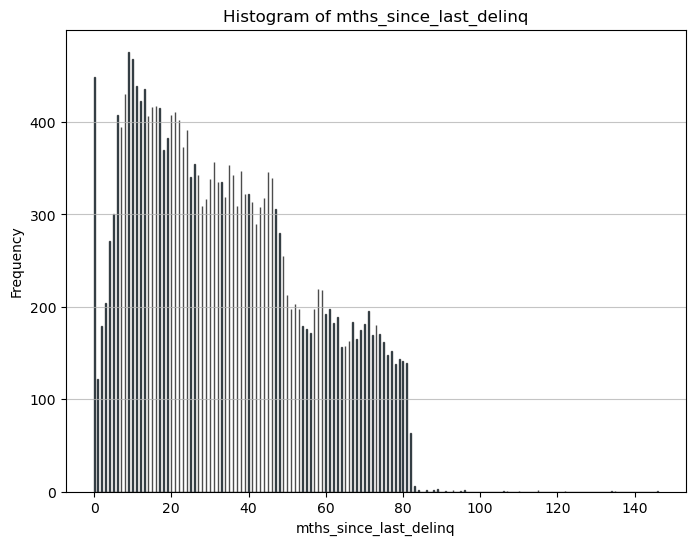

The skew of mths_since_last_delinq column is 0.4381092867649046


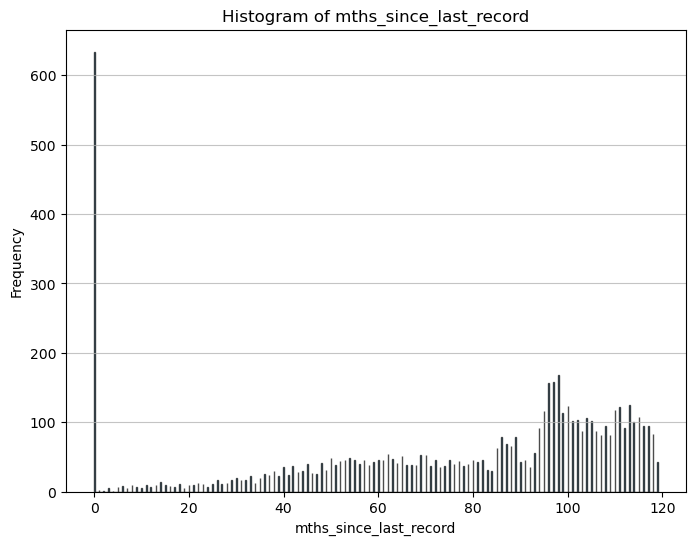

The skew of mths_since_last_record column is -0.8399954833849785


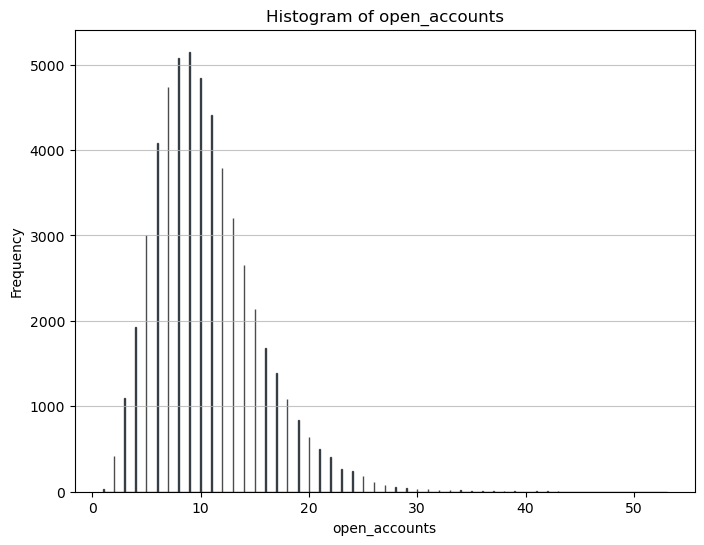

The skew of open_accounts column is 1.0592820053165104


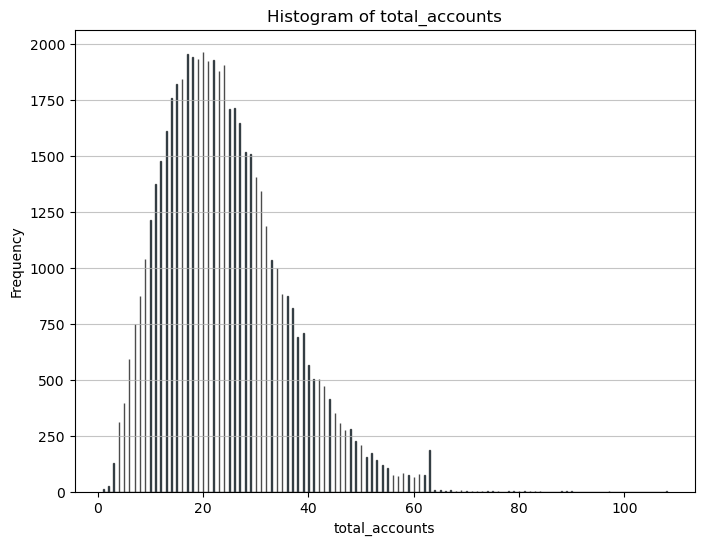

The skew of total_accounts column is 0.7790139244121327


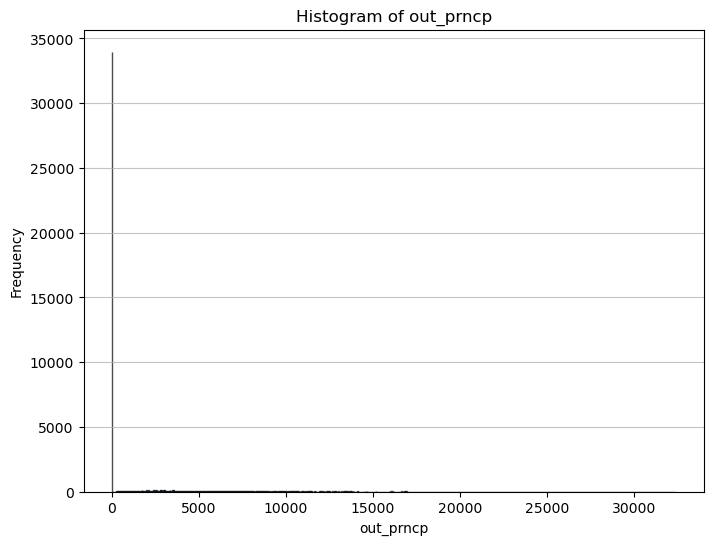

The skew of out_prncp column is 2.356426188671512


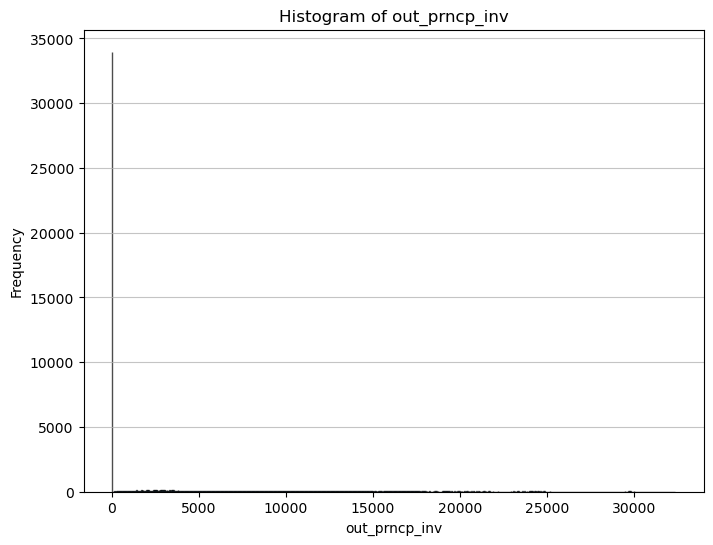

The skew of out_prncp_inv column is 2.3568475131007687


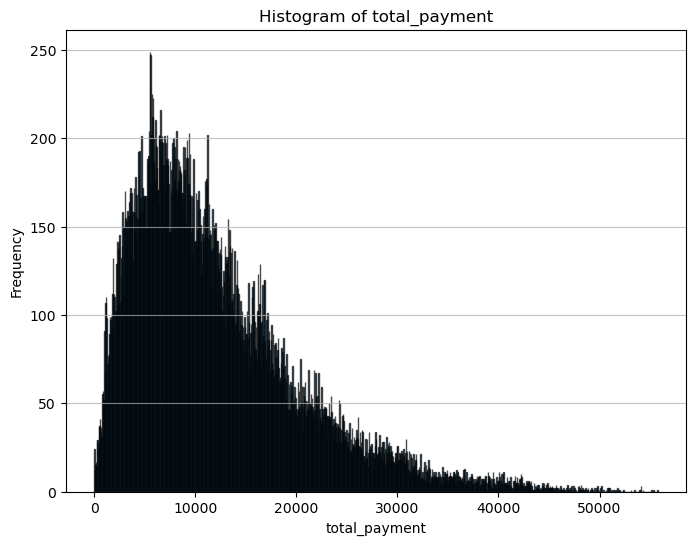

The skew of total_payment column is 1.267890957776937


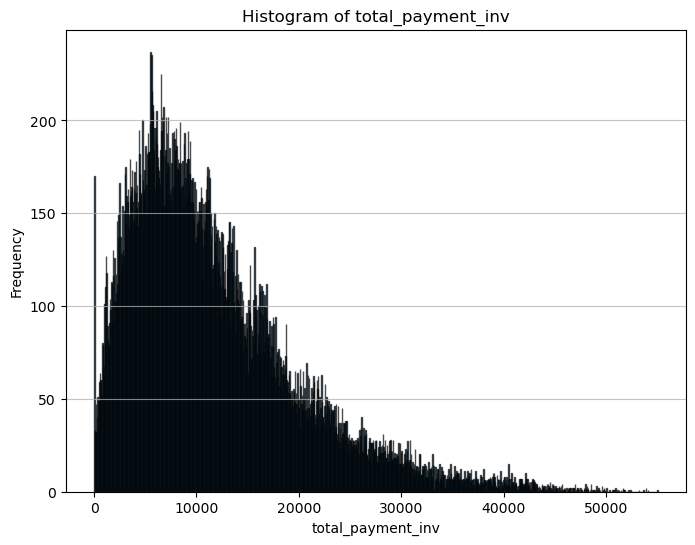

The skew of total_payment_inv column is 1.256196603509513


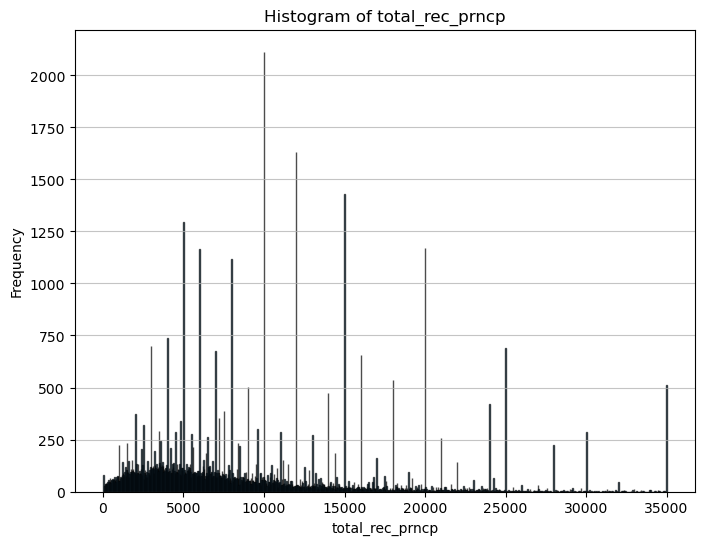

The skew of total_rec_prncp column is 1.2610146774673532


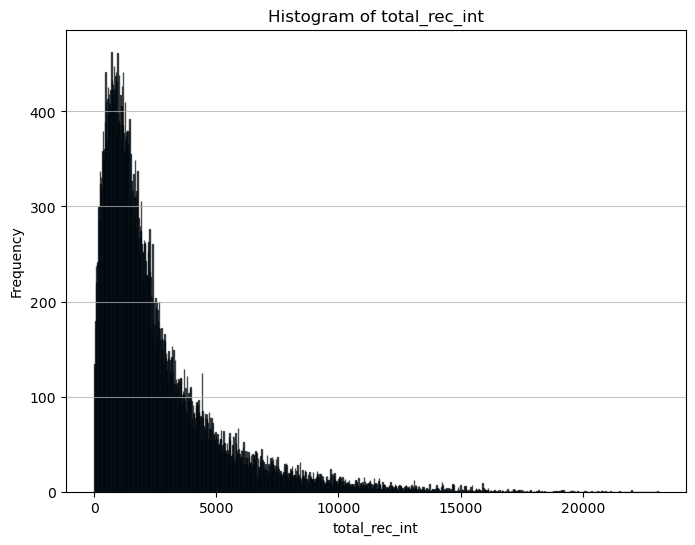

The skew of total_rec_int column is 2.204322035306792


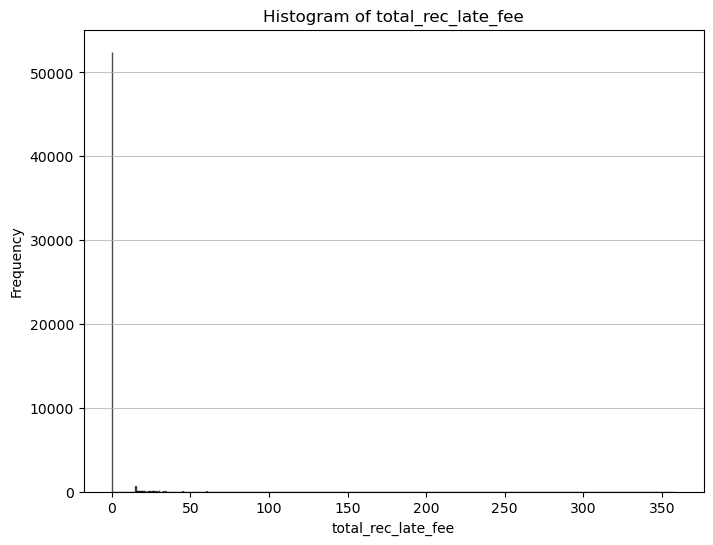

The skew of total_rec_late_fee column is 13.184304523859357


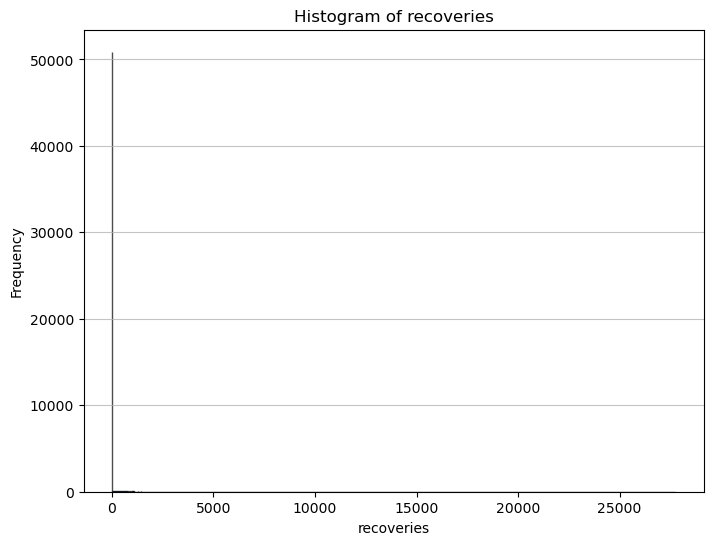

The skew of recoveries column is 14.58979334668037


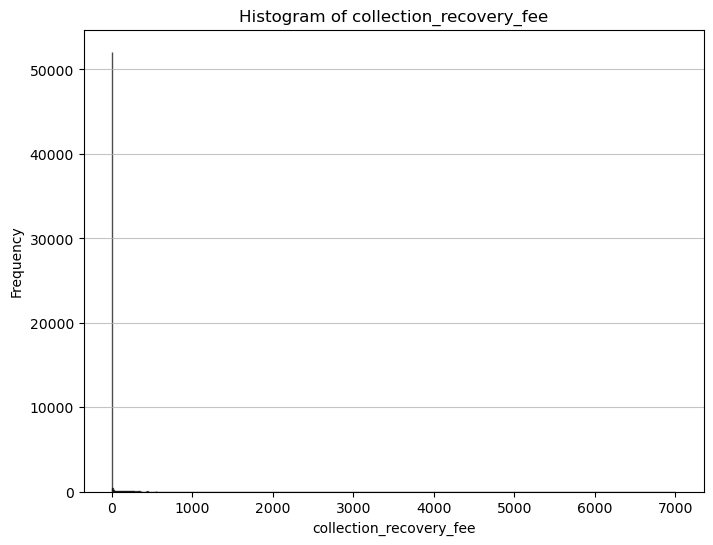

The skew of collection_recovery_fee column is 27.63684310809756
Skipping non-numeric column: last_payment_date


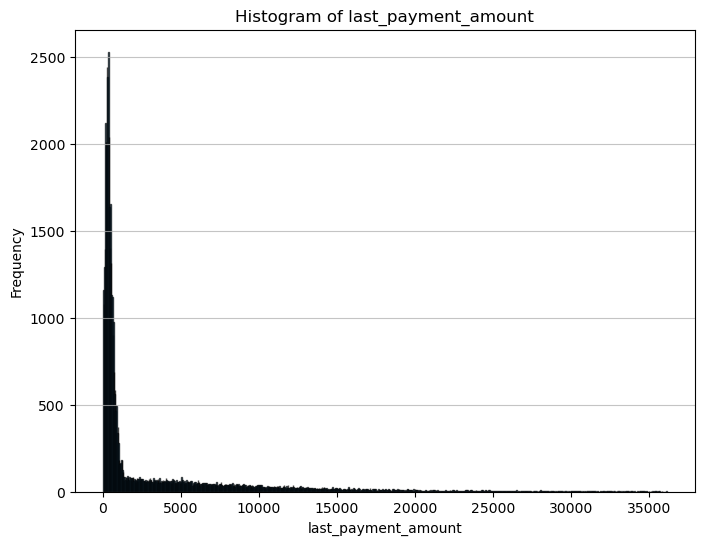

The skew of last_payment_amount column is 2.4993811438984834
Skipping non-numeric column: next_payment_date
Skipping non-numeric column: last_credit_pull_date


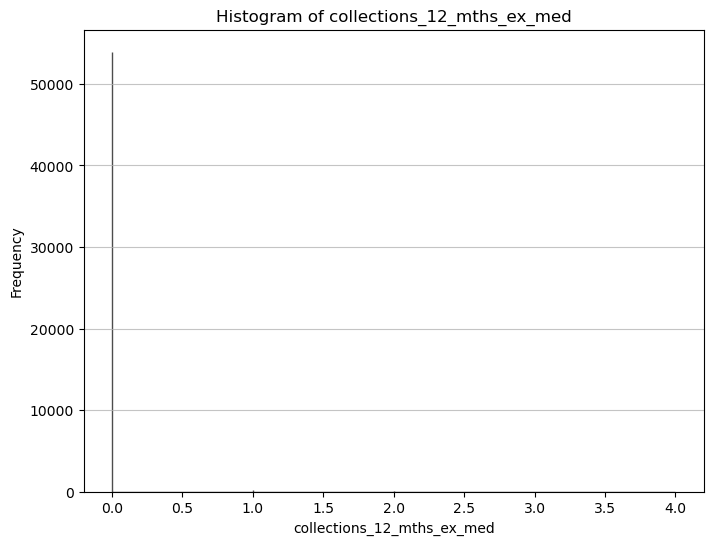

The skew of collections_12_mths_ex_med column is 20.252780275751494


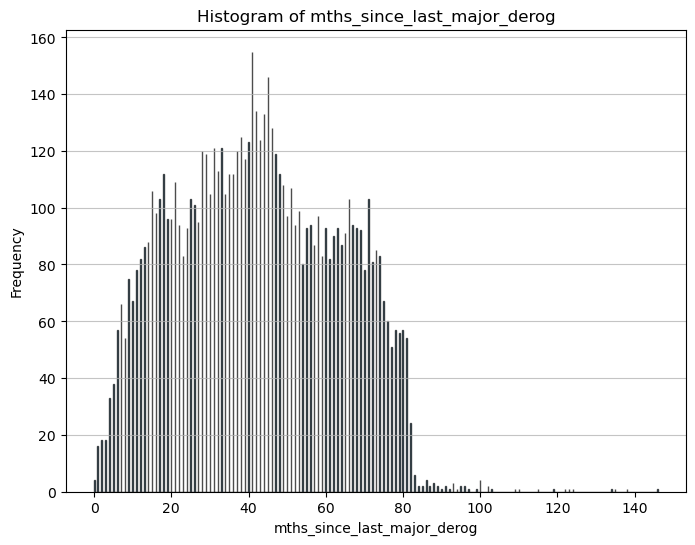

The skew of mths_since_last_major_derog column is 0.16417600133538526


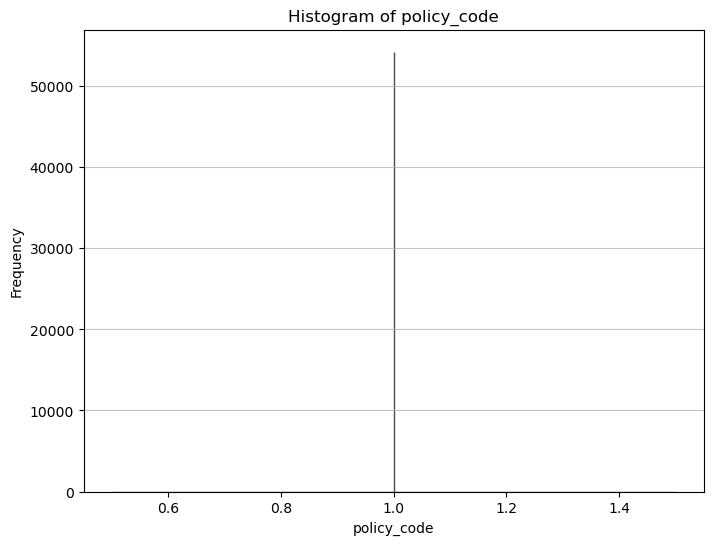

The skew of policy_code column is 0.0
Skipping non-numeric column: application_type


In [11]:
#obtaining historgram plots of the data to confirm it's nature

#creating a plot instance of Plotter class
plot=Plotter(data_df)

plot.histogram()

It is clear from those histogram plots neither distribution is normal, except for maybe policy_code and collections 12_mths_ex_med, but on those graphs x-variable range is too small to be able to tell. 

<Figure size 800x600 with 0 Axes>

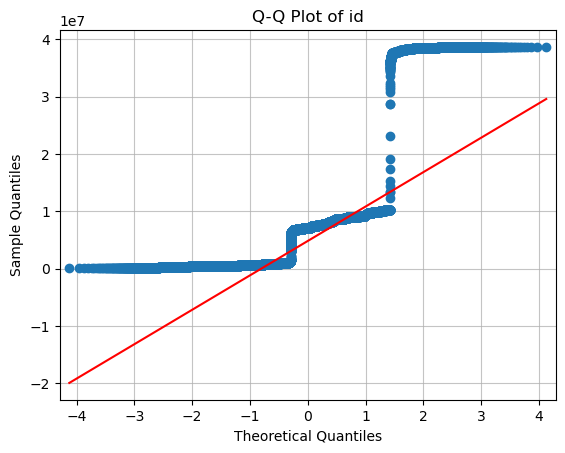

<Figure size 800x600 with 0 Axes>

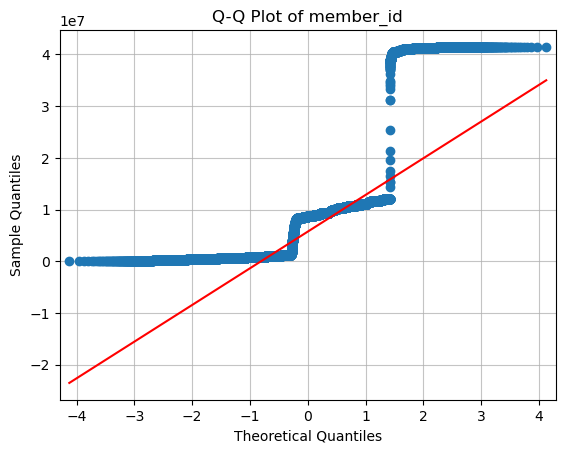

<Figure size 800x600 with 0 Axes>

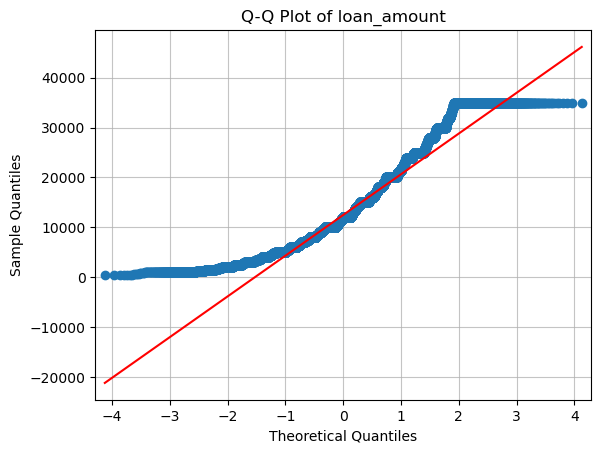

<Figure size 800x600 with 0 Axes>

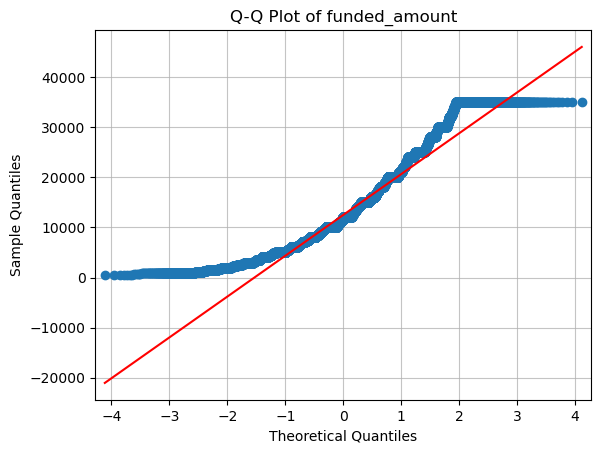

<Figure size 800x600 with 0 Axes>

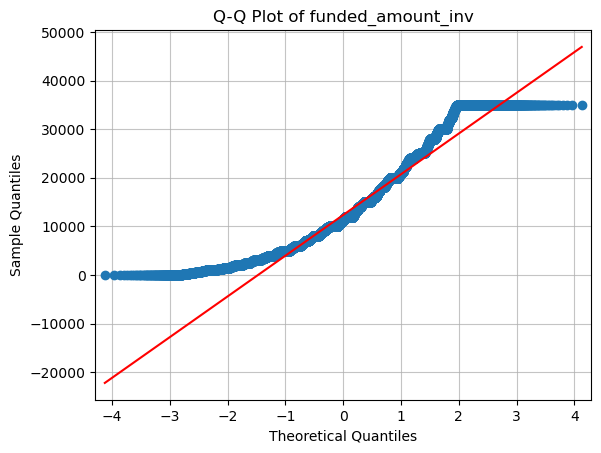

<Figure size 800x600 with 0 Axes>

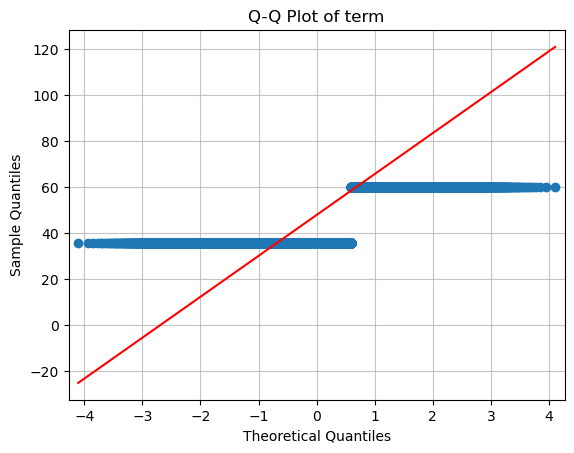

<Figure size 800x600 with 0 Axes>

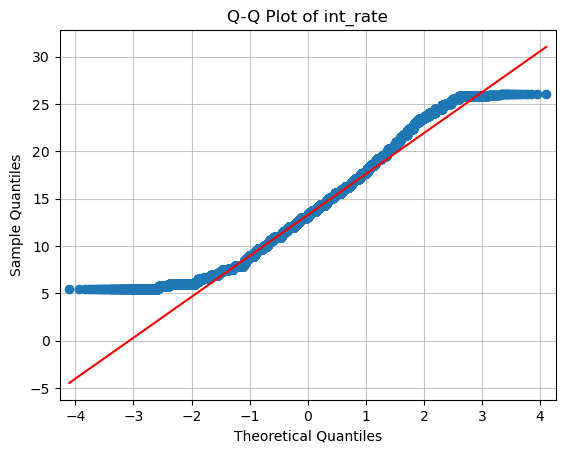

<Figure size 800x600 with 0 Axes>

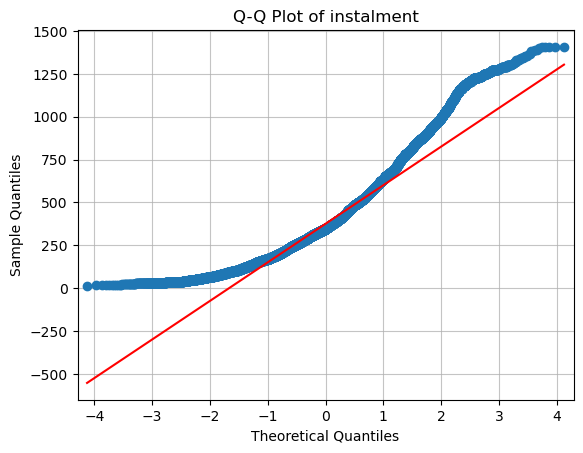

Skipping non-numeric column: grade
Skipping non-numeric column: sub_grade


<Figure size 800x600 with 0 Axes>

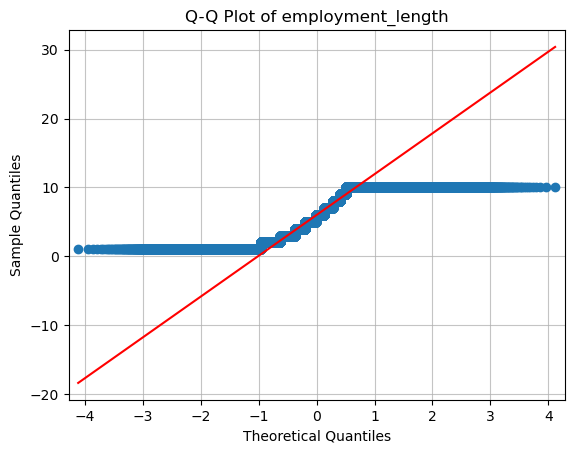

Skipping non-numeric column: home_ownership


<Figure size 800x600 with 0 Axes>

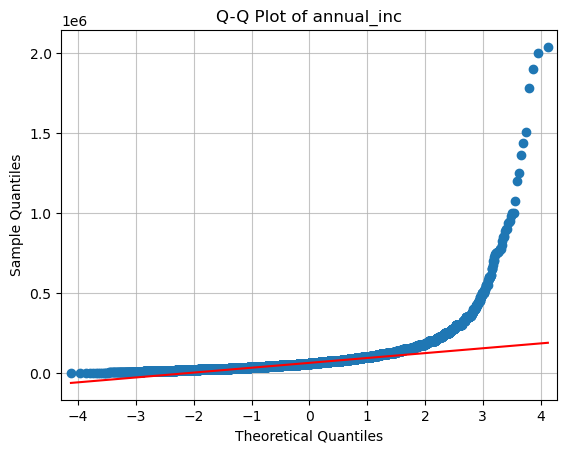

Skipping non-numeric column: verification_status
Skipping non-numeric column: issue_date
Skipping non-numeric column: loan_status
Skipping non-numeric column: payment_plan
Skipping non-numeric column: purpose


<Figure size 800x600 with 0 Axes>

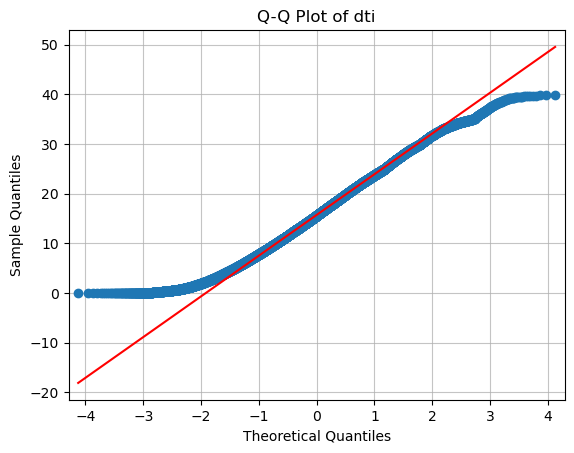

<Figure size 800x600 with 0 Axes>

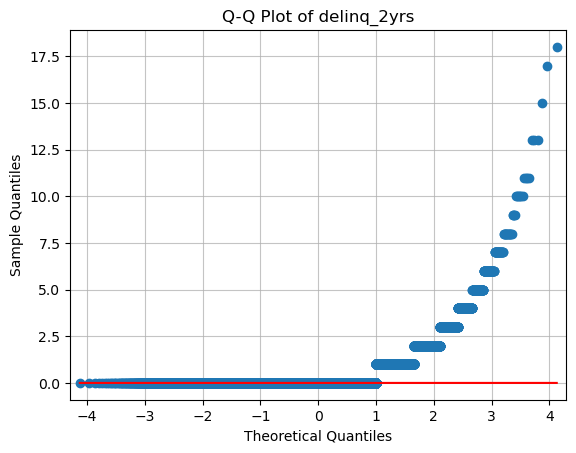

Skipping non-numeric column: earliest_credit_line


<Figure size 800x600 with 0 Axes>

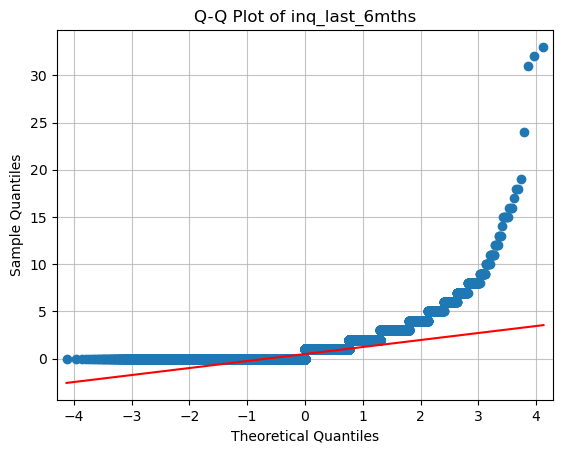

<Figure size 800x600 with 0 Axes>

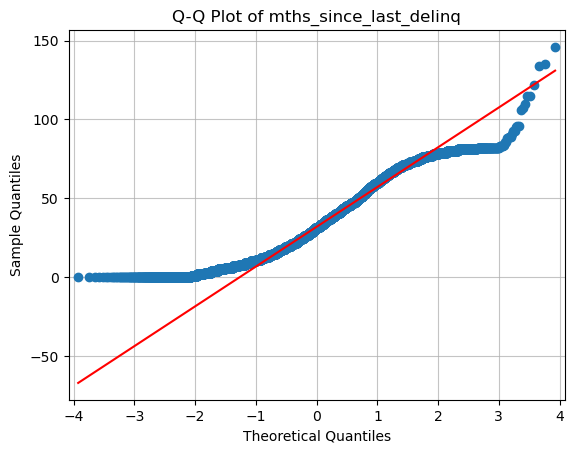

<Figure size 800x600 with 0 Axes>

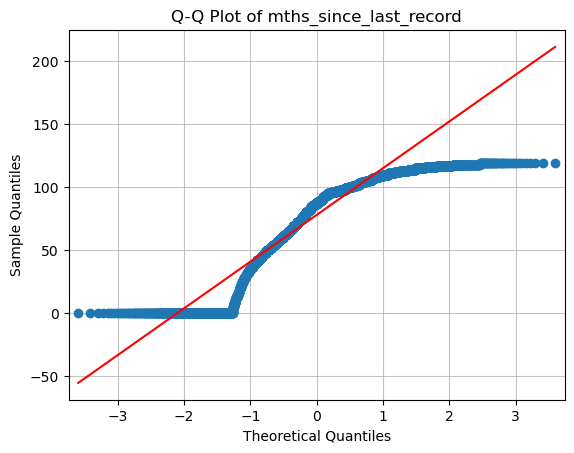

<Figure size 800x600 with 0 Axes>

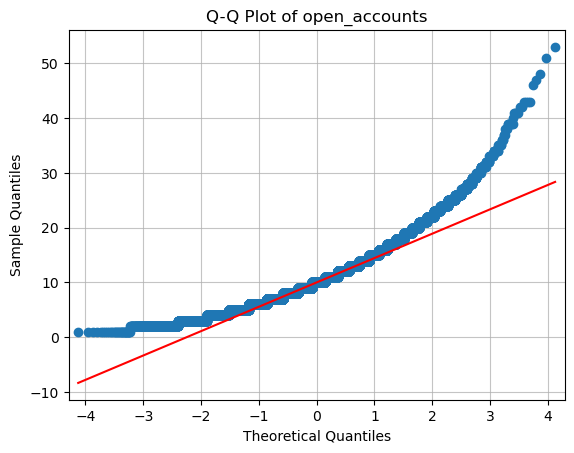

<Figure size 800x600 with 0 Axes>

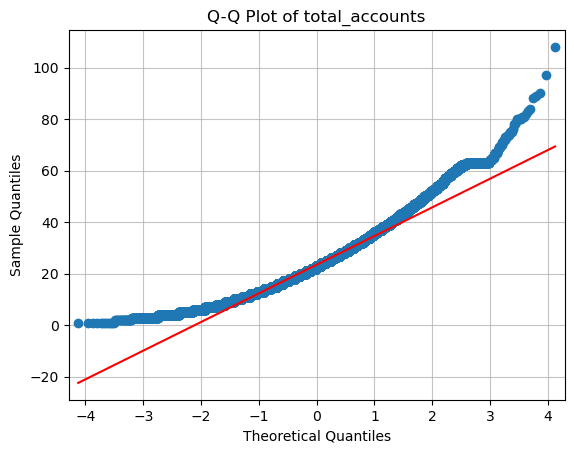

<Figure size 800x600 with 0 Axes>

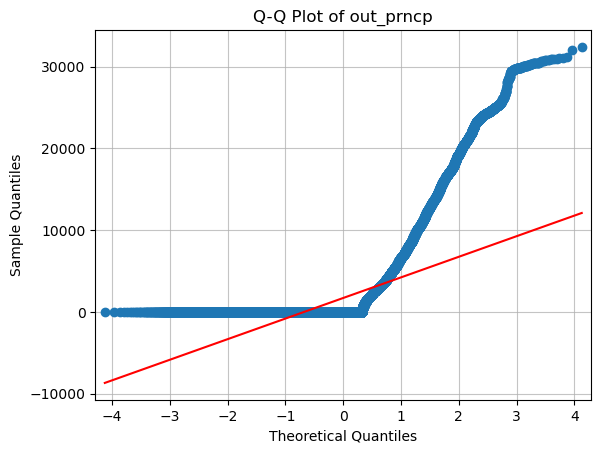

<Figure size 800x600 with 0 Axes>

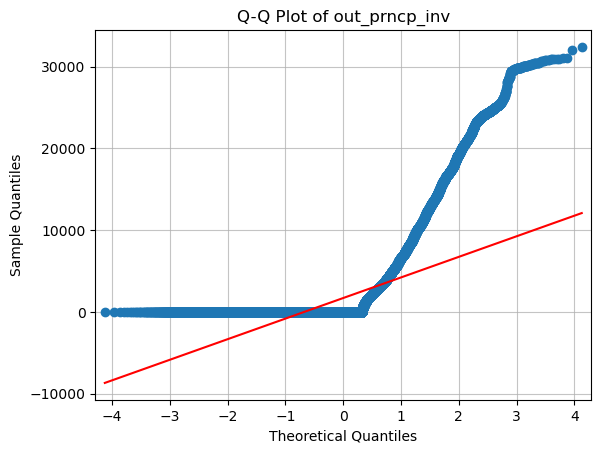

<Figure size 800x600 with 0 Axes>

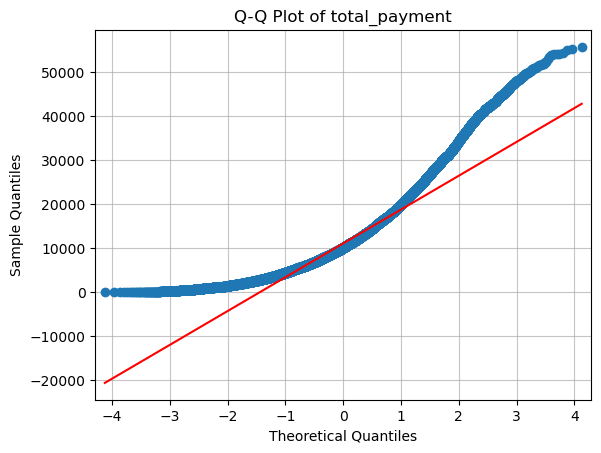

<Figure size 800x600 with 0 Axes>

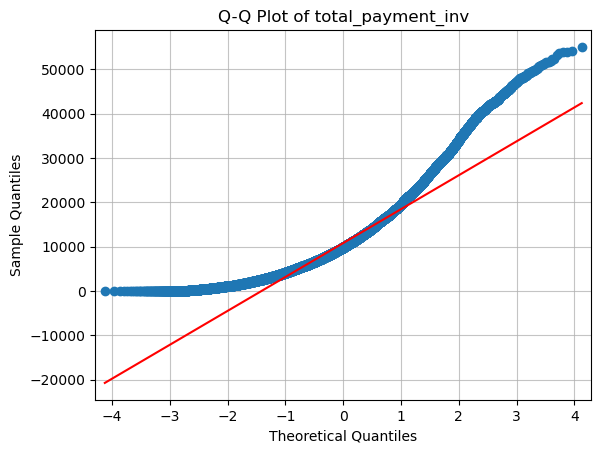

<Figure size 800x600 with 0 Axes>

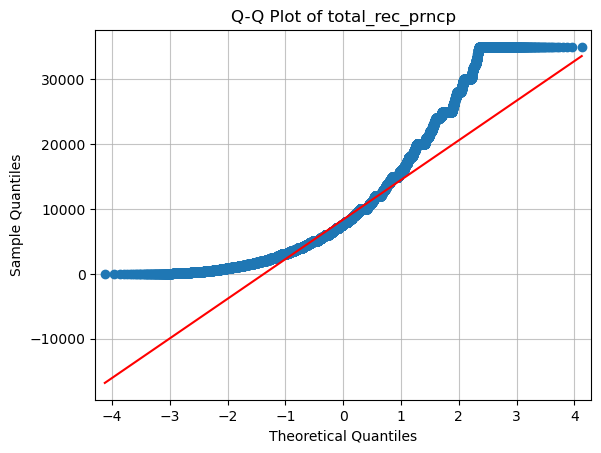

<Figure size 800x600 with 0 Axes>

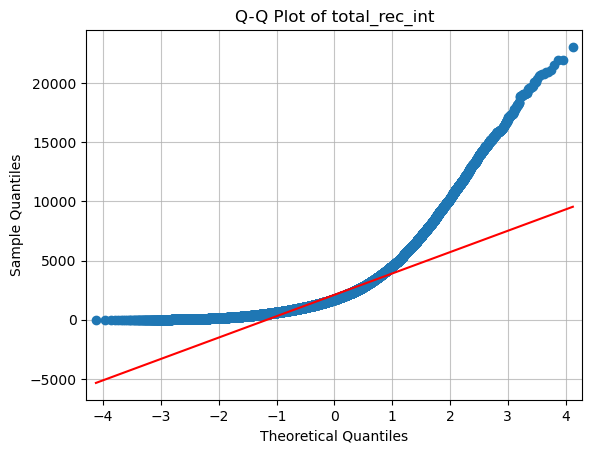

<Figure size 800x600 with 0 Axes>

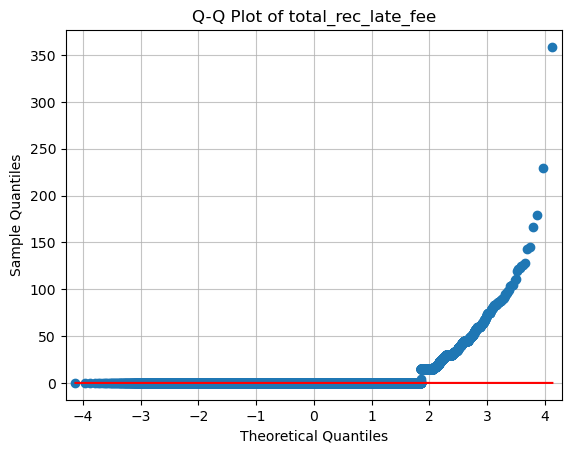

<Figure size 800x600 with 0 Axes>

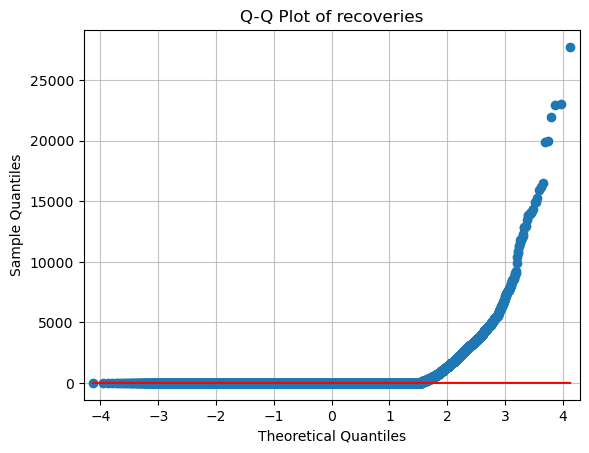

<Figure size 800x600 with 0 Axes>

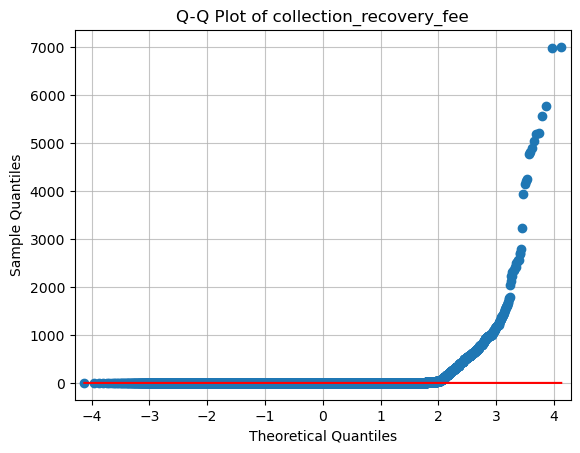

Skipping non-numeric column: last_payment_date


<Figure size 800x600 with 0 Axes>

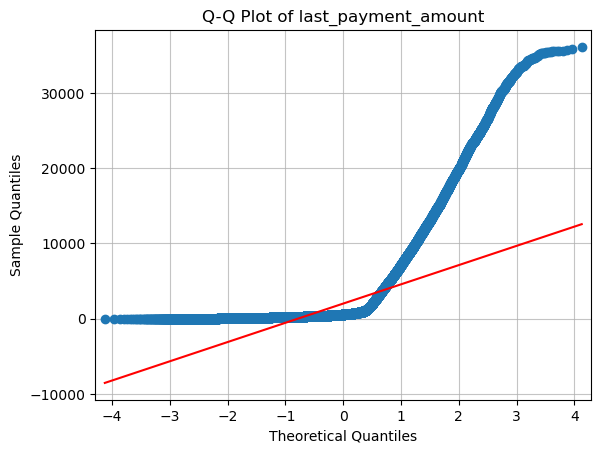

Skipping non-numeric column: next_payment_date
Skipping non-numeric column: last_credit_pull_date


<Figure size 800x600 with 0 Axes>

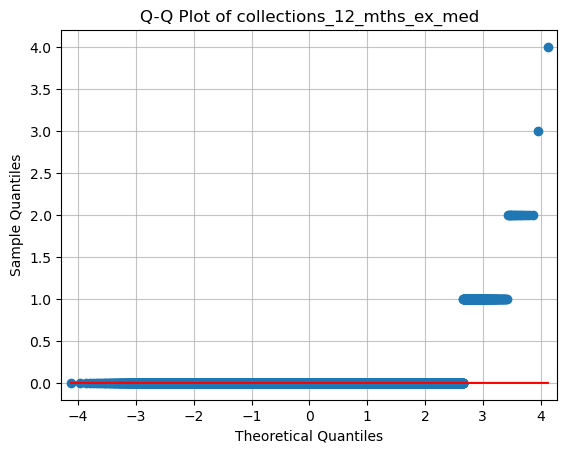

<Figure size 800x600 with 0 Axes>

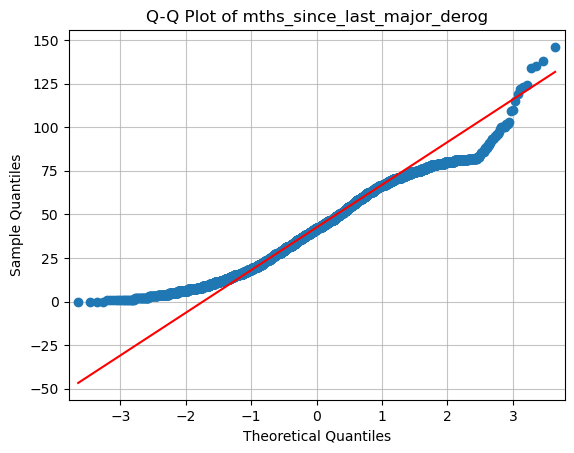

<Figure size 800x600 with 0 Axes>

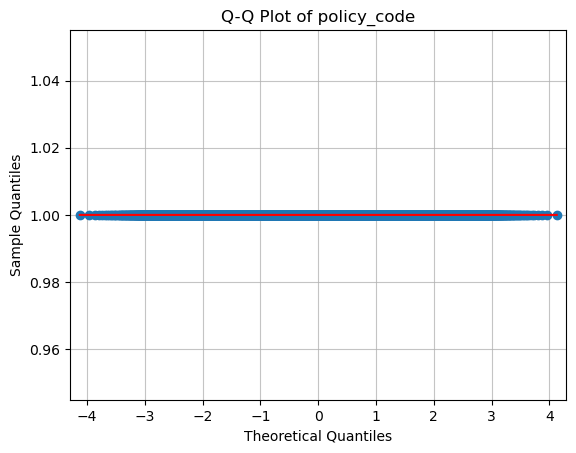

Skipping non-numeric column: application_type


In [12]:
#obtaining q-q plots of the data
plot.q_q_plot()

Except for policy code the red and blue lines do not align all through out the graph suggesting that normal distribution is not being followed for all of the data range. As policy code has no missing values and no other variables seem to follow normal distribution we are ok to impute other columns with median values. 

In [13]:
#creating an instance of the class to transform the value removing columns with 50% nulls and imputing missing values in other columns with median
transform=DataFrameTransform(data_df)

#drops columns 
transform.drop_columns_with_missing_and_constant_values()

#remove the 80 rows where null values occur for categorical data (dates).
transform.drop_rows_with_nulls_in_columns(['last_payment_date','last_credit_pull_date'])

#imputes with median coulmns that have less then 10% missing values. 
revised_df=transform.impute_missing_values(10,'median')

#creating new instance of info class with new revised daframe
info=DataFrameInfo(revised_df)

#cheking that there are no more null values
info.column_statistics()

AttributeError: 'DataFrameTransform' object has no attribute 'drop_columns_with_missing_and_constant_values'

The count of mssing values is no zero for all remaining varaibles, hence the imputations have been successful. Furthermore mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog' are no longer present hence they have been succesfully removed. 

Generating a heatmap of null values before and after to confirm those findings.

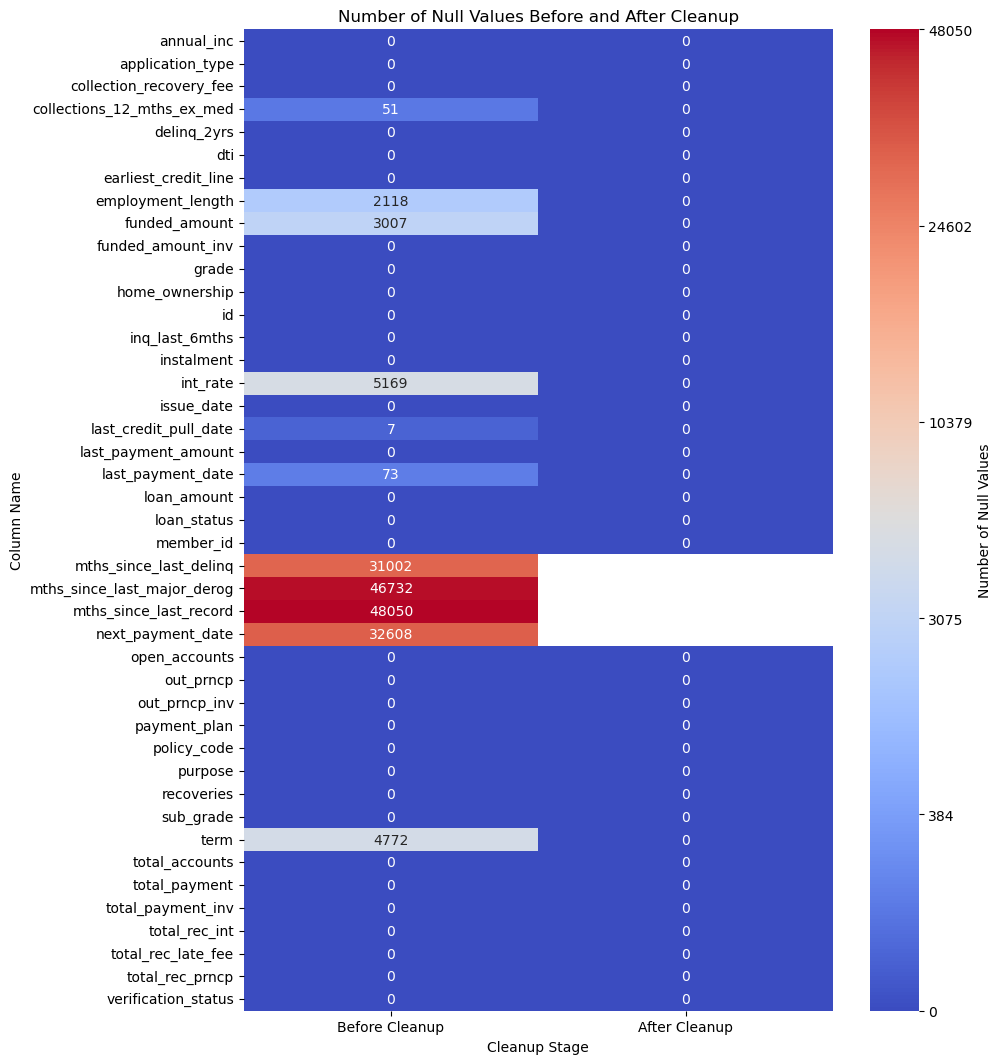

In [14]:
plot.plot_null_values_heatmap(revised_df)

### Nulls Conclusion

From the chart above we can see all null values have been sucessfully removed, we can also see the variables that have been removed entirely due to a too large number of null values. 

### Transformations on Skewed Data

First let's view the histograms and q-q plots again for each column.

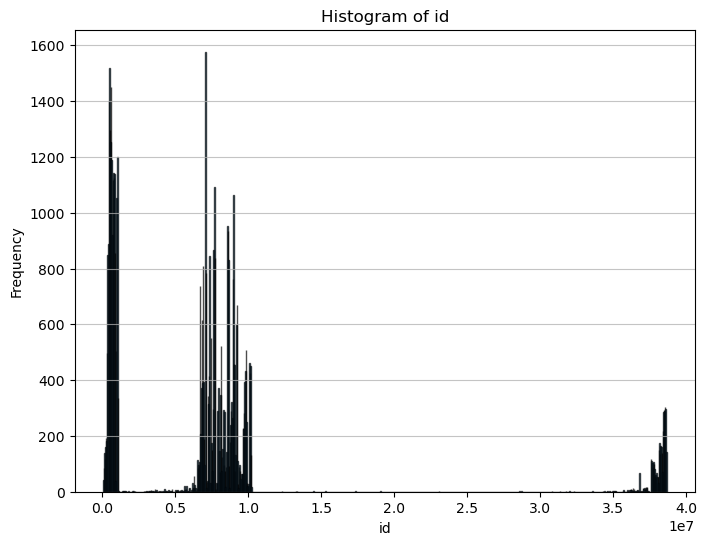

The skew of id column is 2.3702266298371617


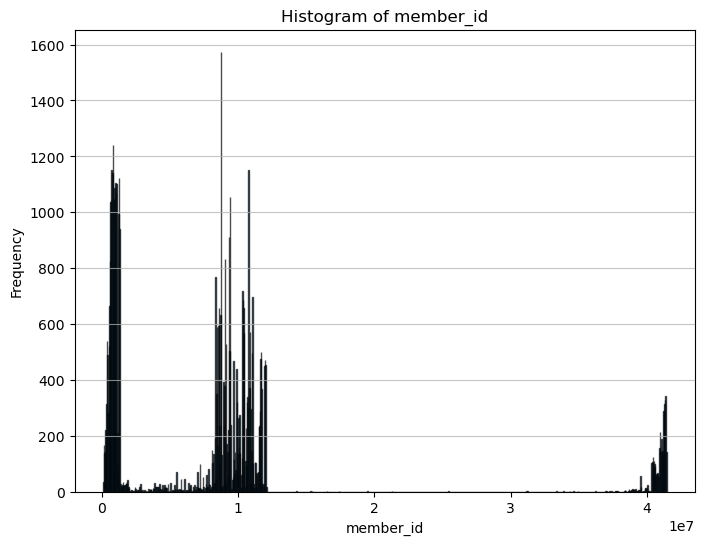

The skew of member_id column is 2.205248048809822


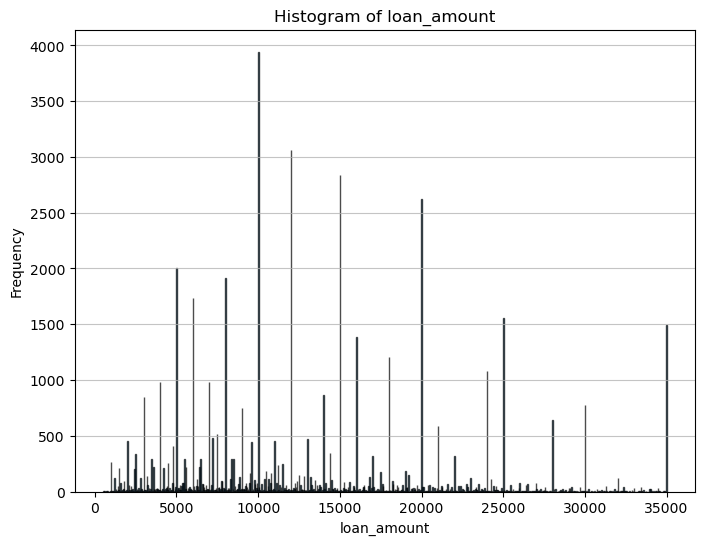

The skew of loan_amount column is 0.8049220181025606


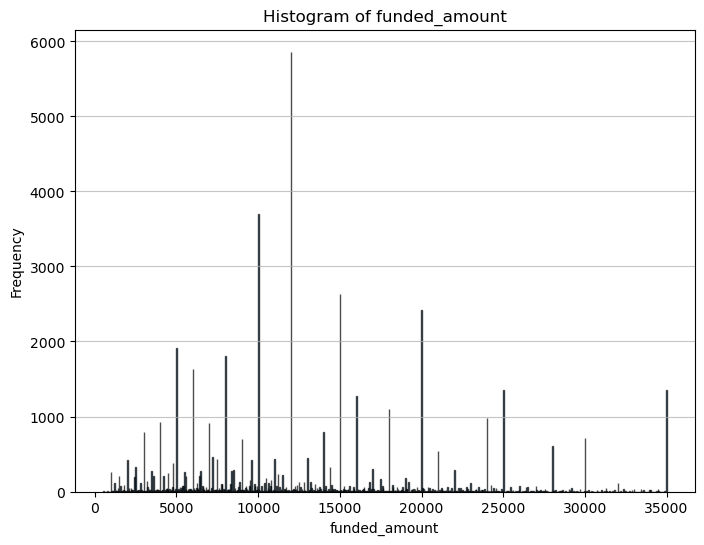

The skew of funded_amount column is 0.8696343258205478


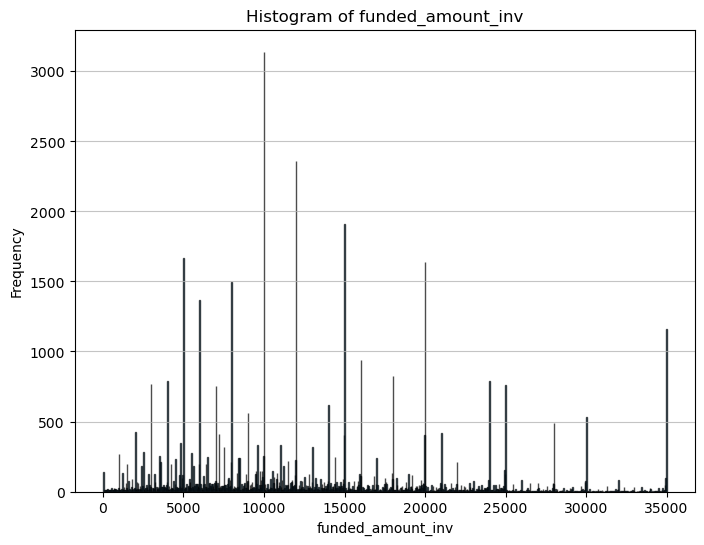

The skew of funded_amount_inv column is 0.8133760847946324


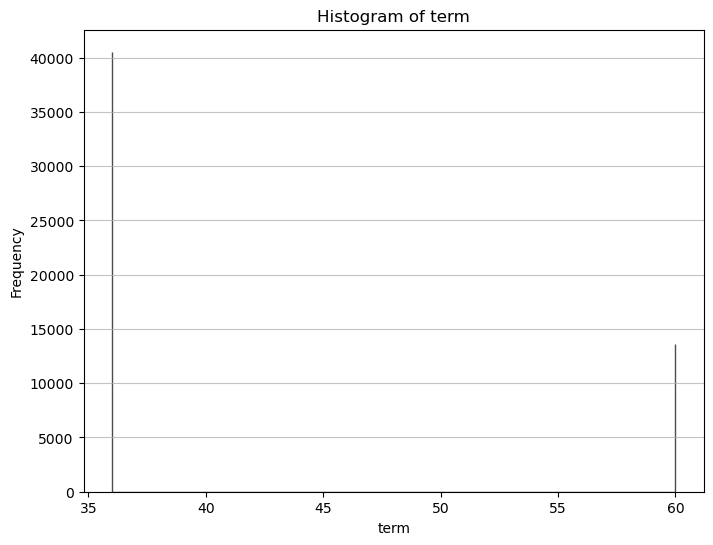

The skew of term column is 1.1477822801014974


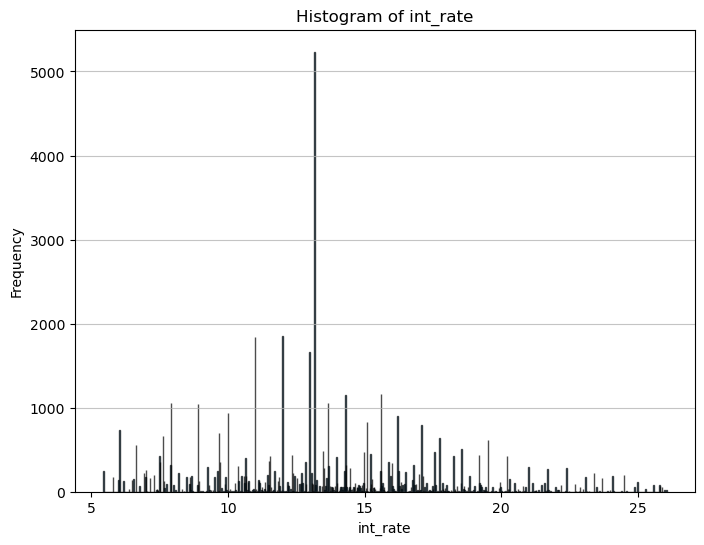

The skew of int_rate column is 0.45661978102982004


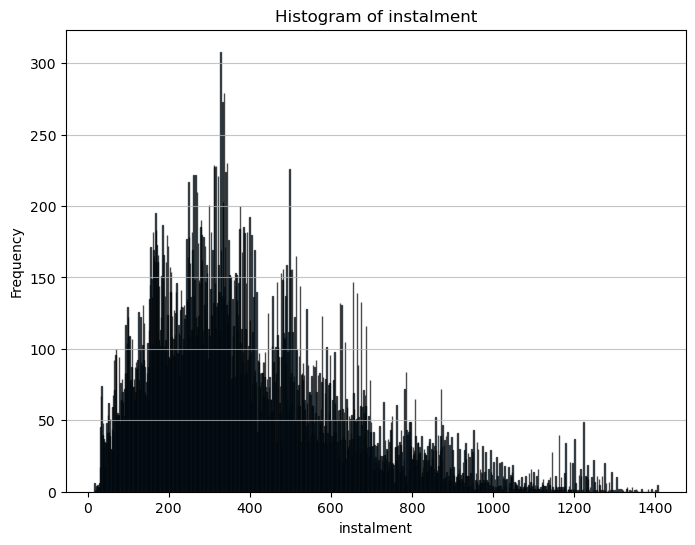

The skew of instalment column is 0.9965721690437305
Skipping non-numeric column: grade
Skipping non-numeric column: sub_grade


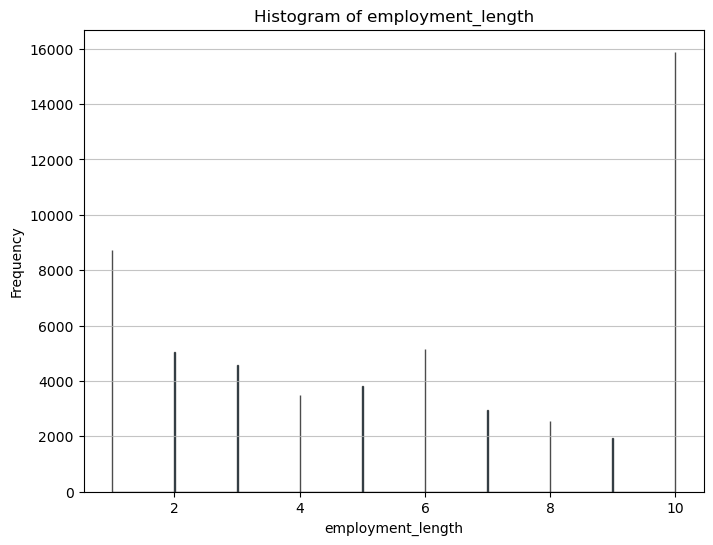

The skew of employment_length column is -0.03950845750136528
Skipping non-numeric column: home_ownership


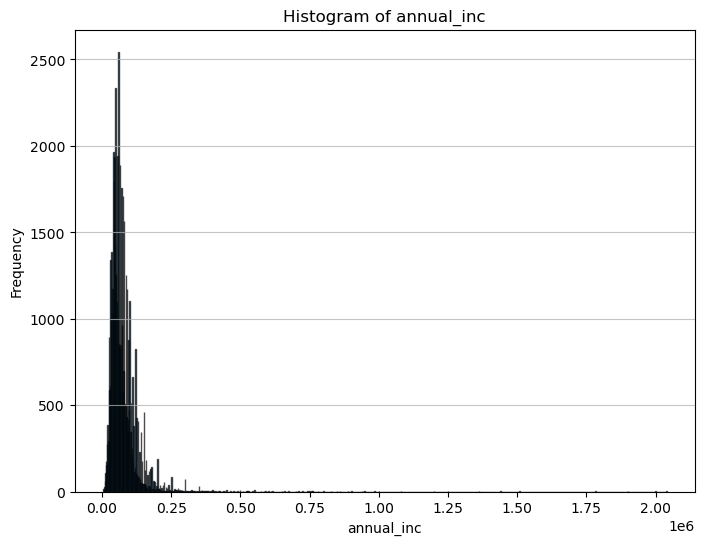

The skew of annual_inc column is 8.717499605870014
Skipping non-numeric column: verification_status
Skipping non-numeric column: issue_date
Skipping non-numeric column: loan_status
Skipping non-numeric column: payment_plan
Skipping non-numeric column: purpose


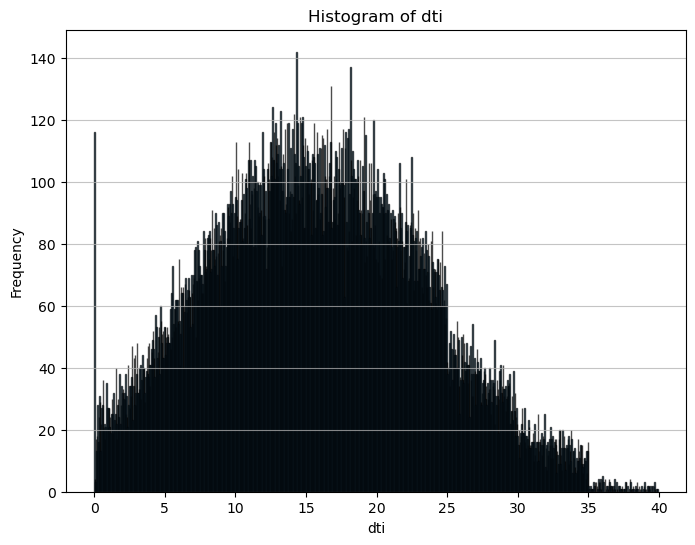

The skew of dti column is 0.18910057534680505


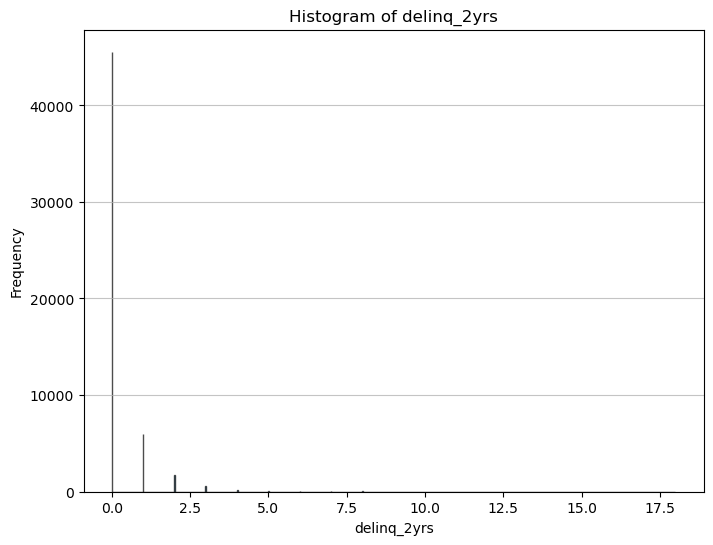

The skew of delinq_2yrs column is 5.376384516017939
Skipping non-numeric column: earliest_credit_line


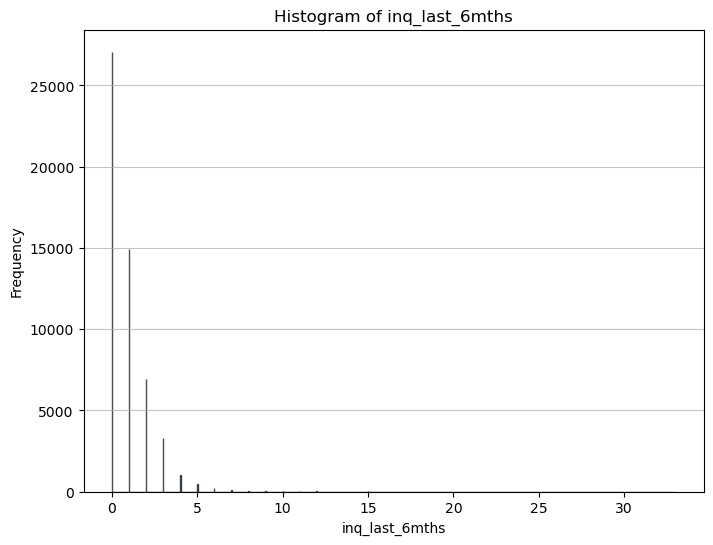

The skew of inq_last_6mths column is 3.253522804381087


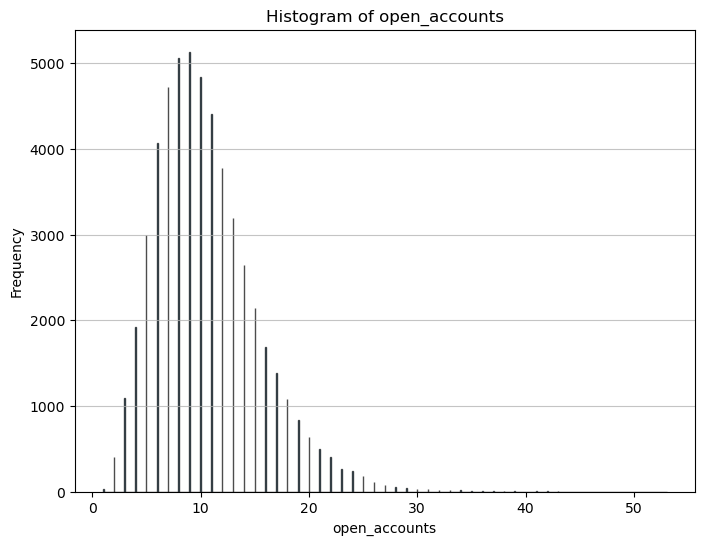

The skew of open_accounts column is 1.0591835802494733


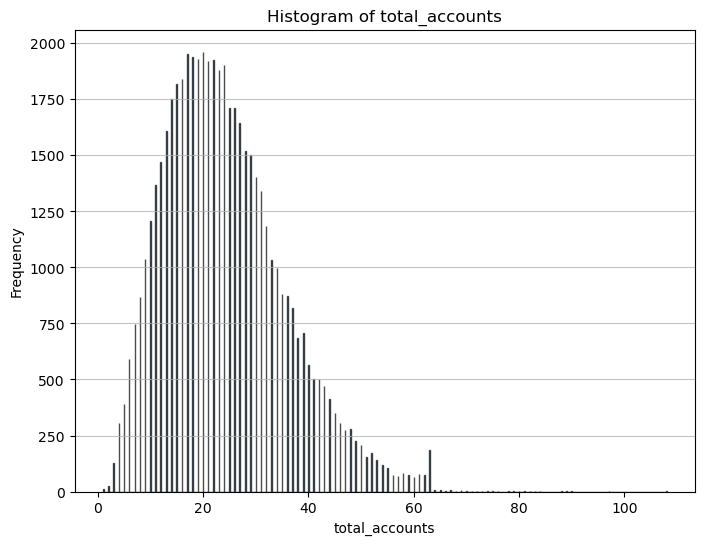

The skew of total_accounts column is 0.7790400286166349


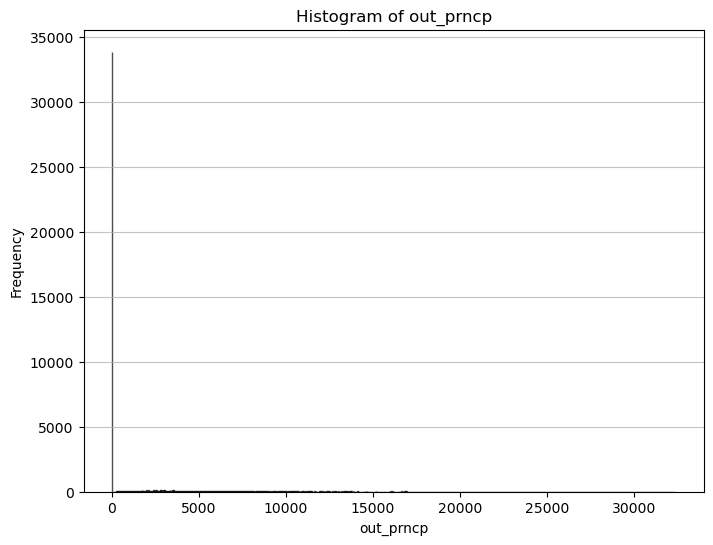

The skew of out_prncp column is 2.35405079479137


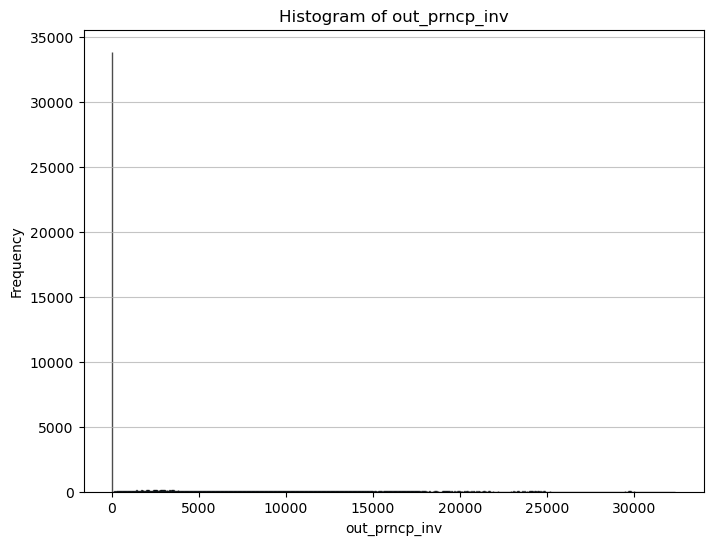

The skew of out_prncp_inv column is 2.354471408893565


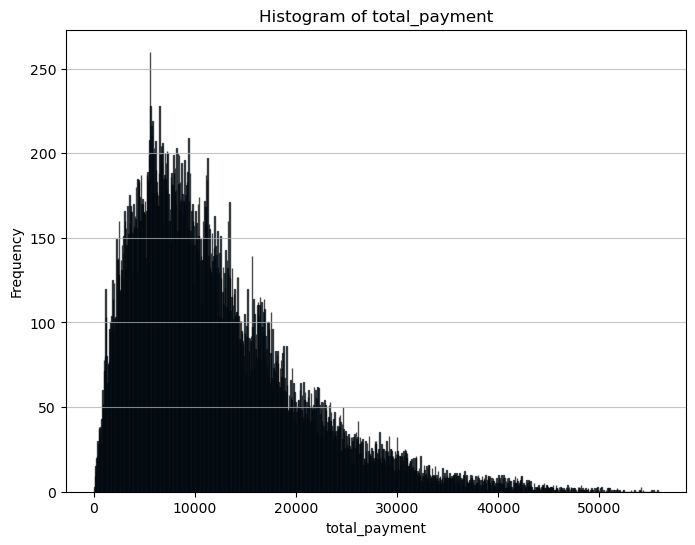

The skew of total_payment column is 1.2698752968451772


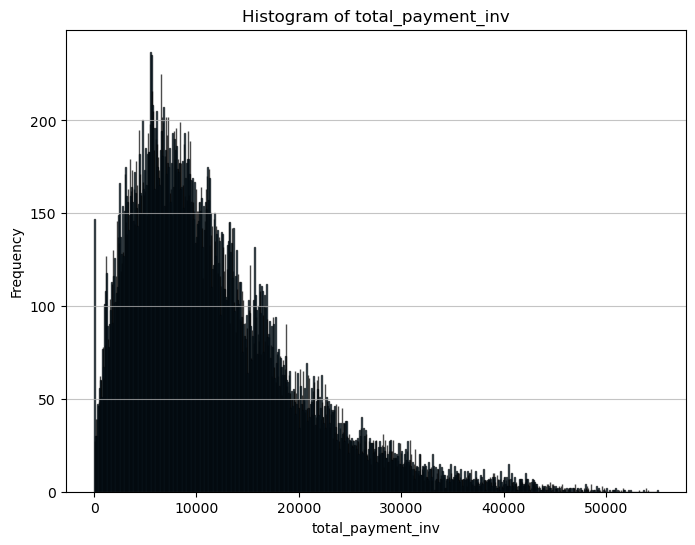

The skew of total_payment_inv column is 1.257870048149293


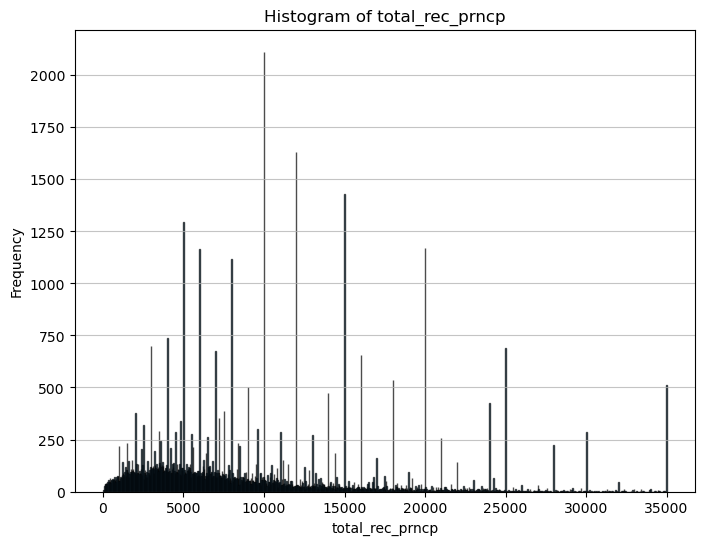

The skew of total_rec_prncp column is 1.2626785390807123


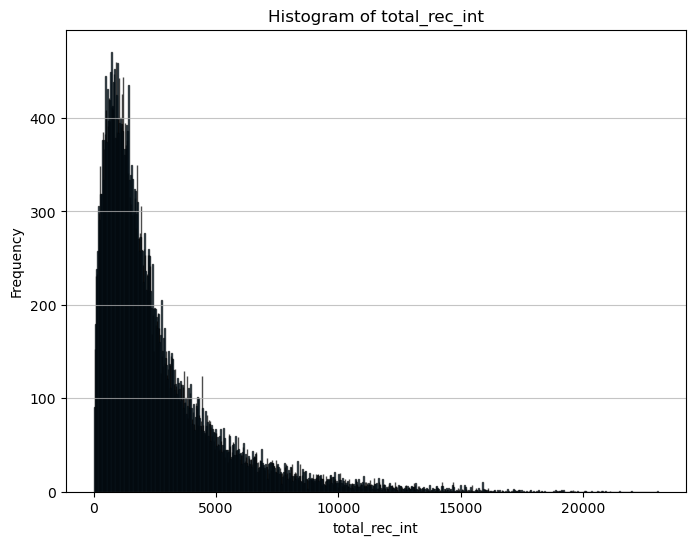

The skew of total_rec_int column is 2.2045848938701638


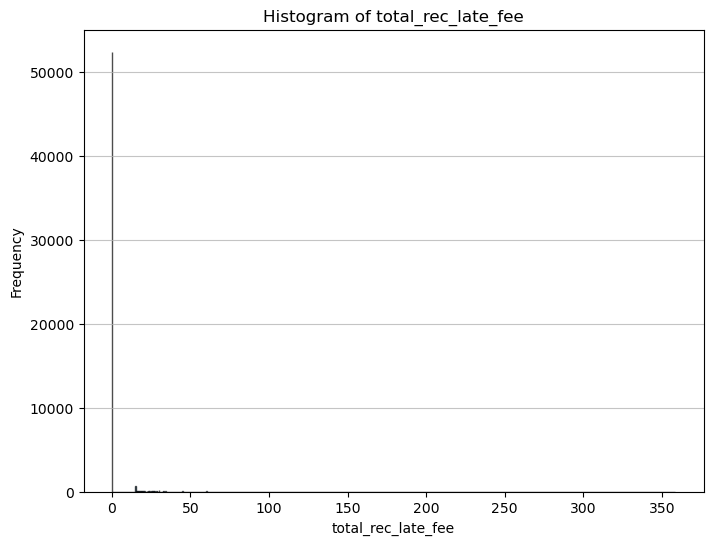

The skew of total_rec_late_fee column is 13.174553220535644


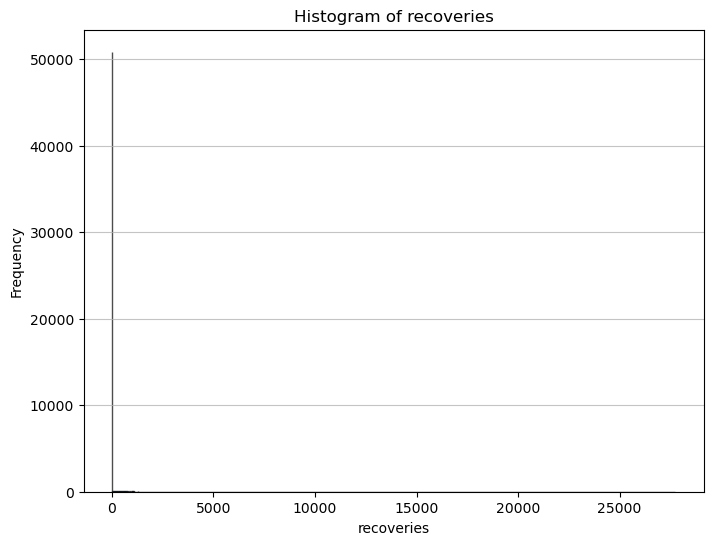

The skew of recoveries column is 14.389298686317593


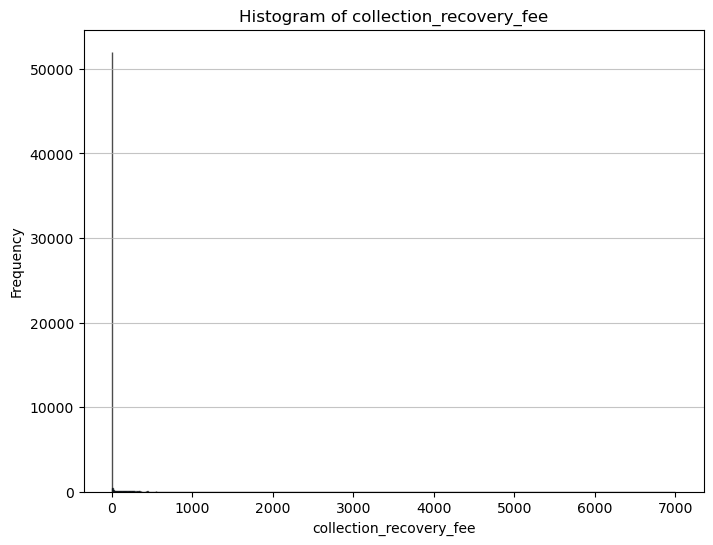

The skew of collection_recovery_fee column is 27.807754340152847
Skipping non-numeric column: last_payment_date


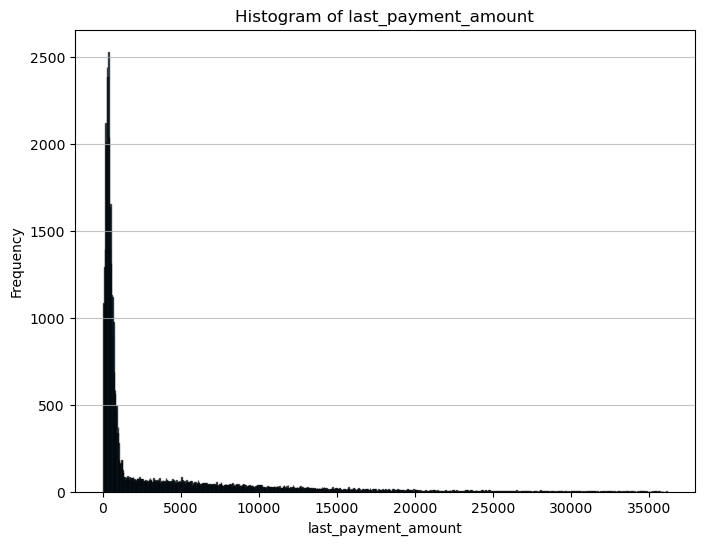

The skew of last_payment_amount column is 2.4972203995928135
Skipping non-numeric column: last_credit_pull_date


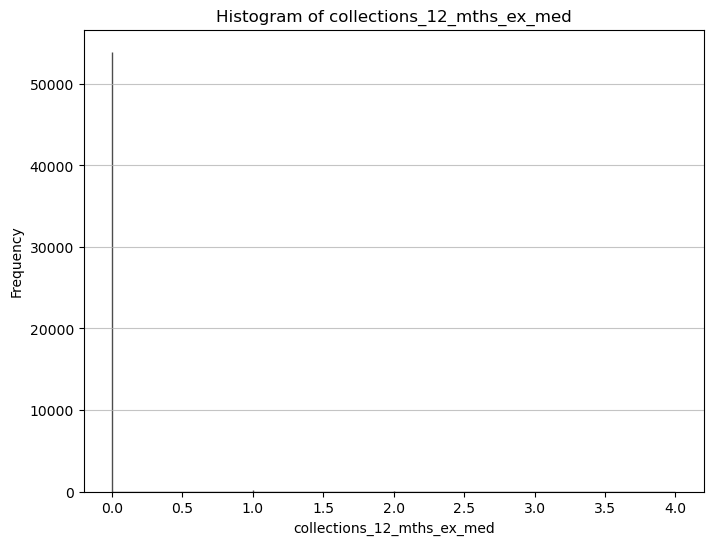

The skew of collections_12_mths_ex_med column is 20.307695011511576


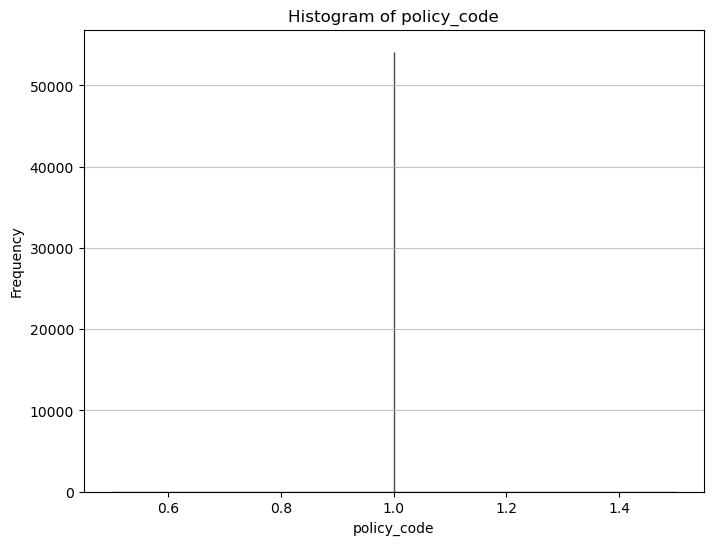

The skew of policy_code column is 0.0
Skipping non-numeric column: application_type


In [15]:
plot=Plotter(revised_df)

plot.histogram()

<Figure size 800x600 with 0 Axes>

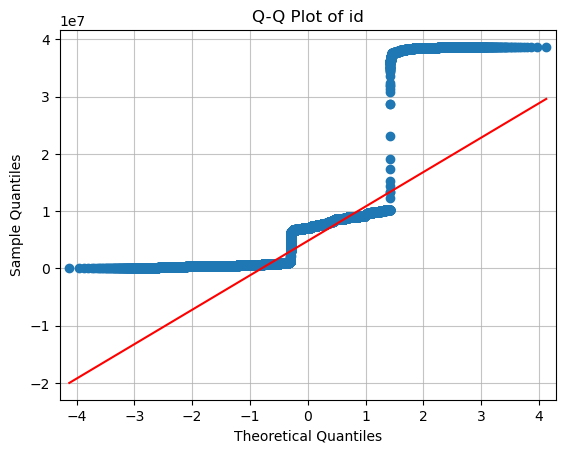

<Figure size 800x600 with 0 Axes>

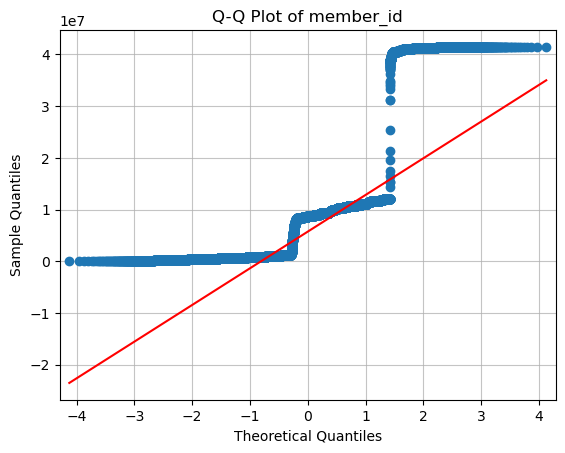

<Figure size 800x600 with 0 Axes>

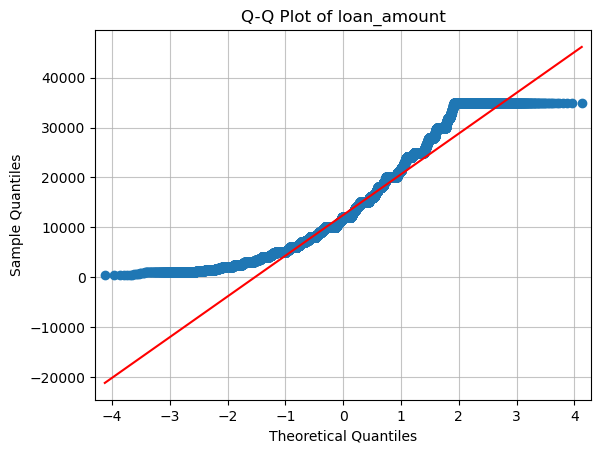

<Figure size 800x600 with 0 Axes>

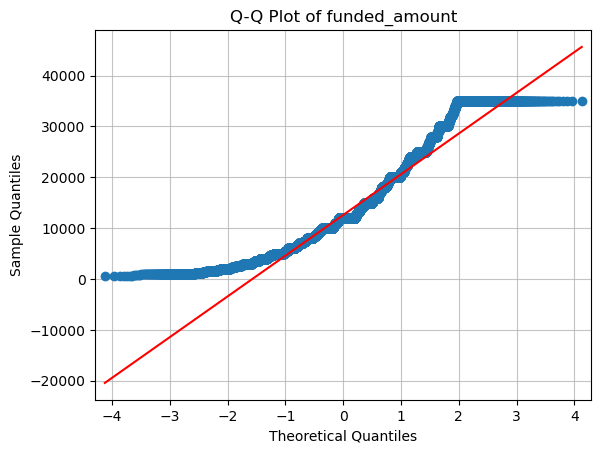

<Figure size 800x600 with 0 Axes>

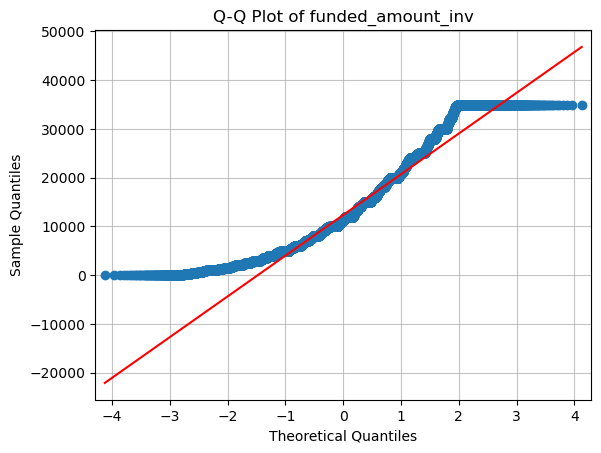

<Figure size 800x600 with 0 Axes>

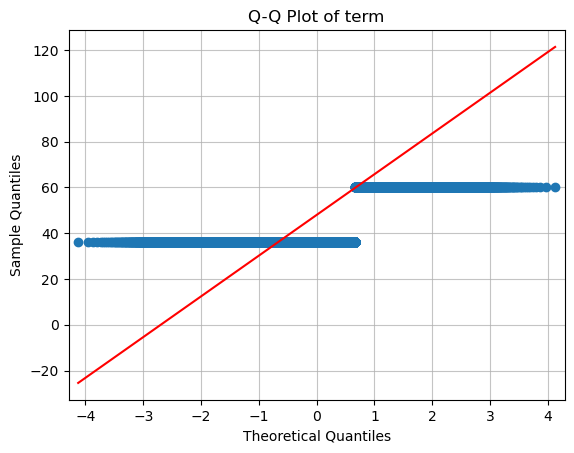

<Figure size 800x600 with 0 Axes>

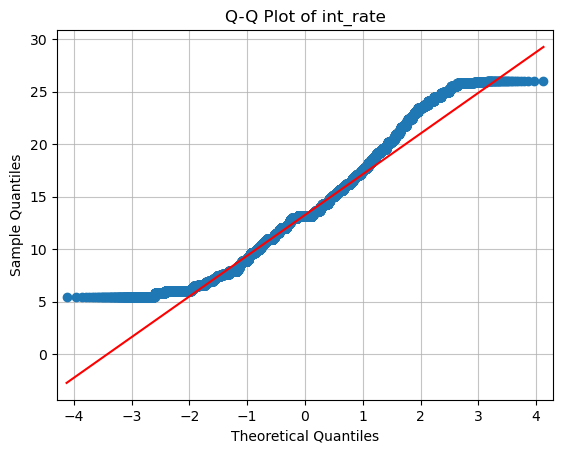

<Figure size 800x600 with 0 Axes>

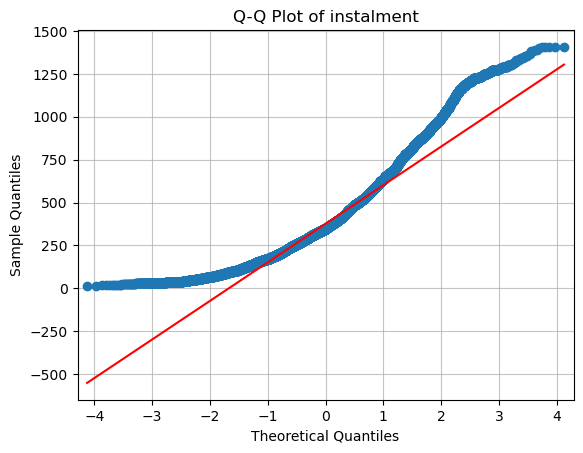

Skipping non-numeric column: grade
Skipping non-numeric column: sub_grade


<Figure size 800x600 with 0 Axes>

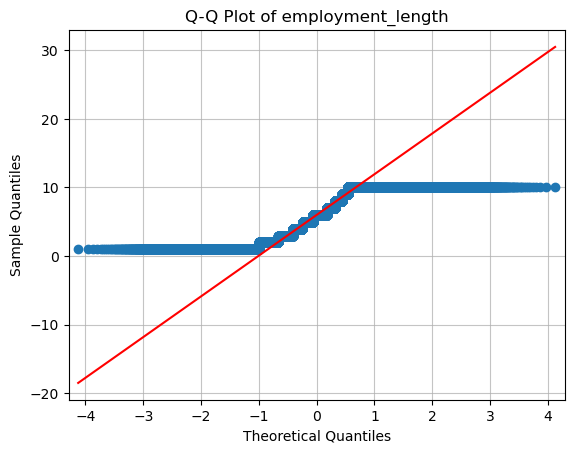

Skipping non-numeric column: home_ownership


<Figure size 800x600 with 0 Axes>

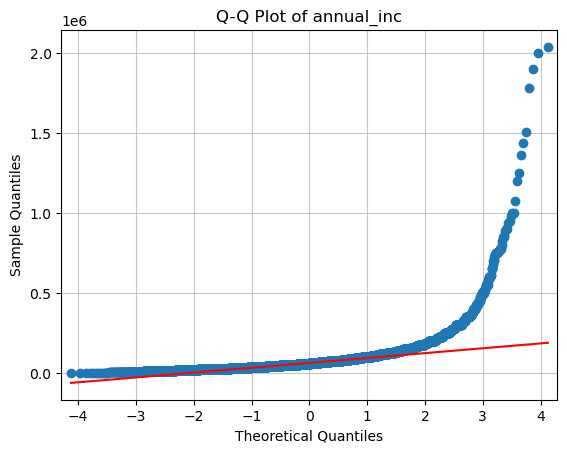

Skipping non-numeric column: verification_status
Skipping non-numeric column: issue_date
Skipping non-numeric column: loan_status
Skipping non-numeric column: payment_plan
Skipping non-numeric column: purpose


<Figure size 800x600 with 0 Axes>

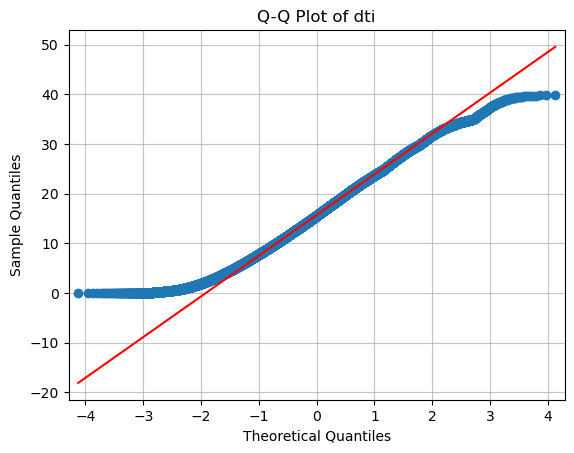

<Figure size 800x600 with 0 Axes>

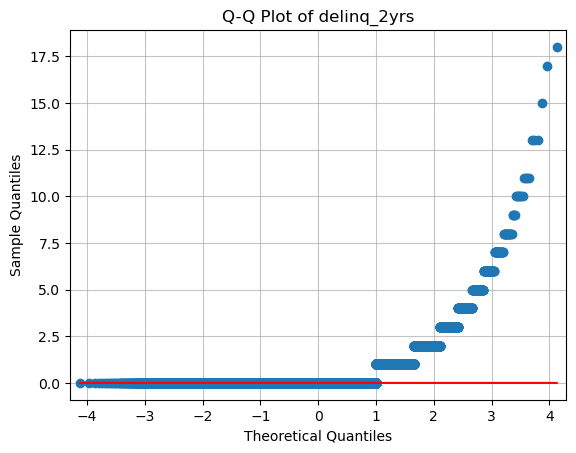

Skipping non-numeric column: earliest_credit_line


<Figure size 800x600 with 0 Axes>

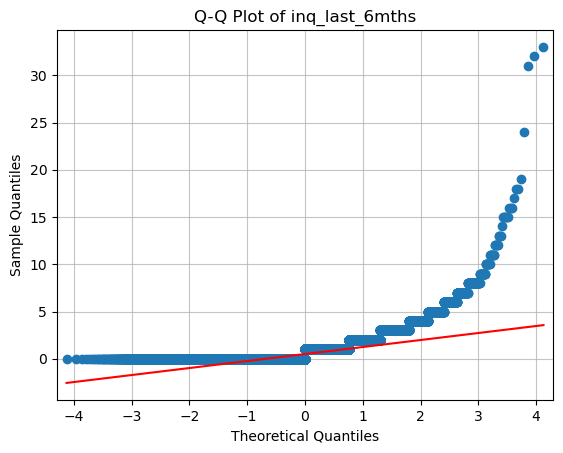

<Figure size 800x600 with 0 Axes>

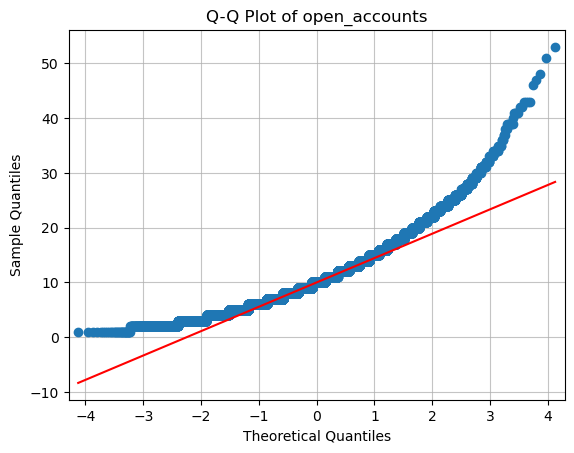

<Figure size 800x600 with 0 Axes>

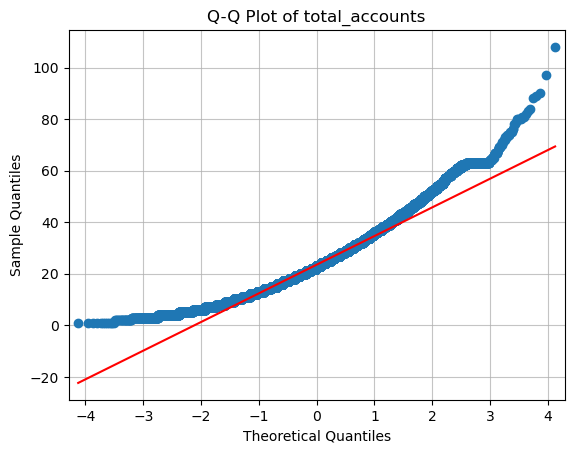

<Figure size 800x600 with 0 Axes>

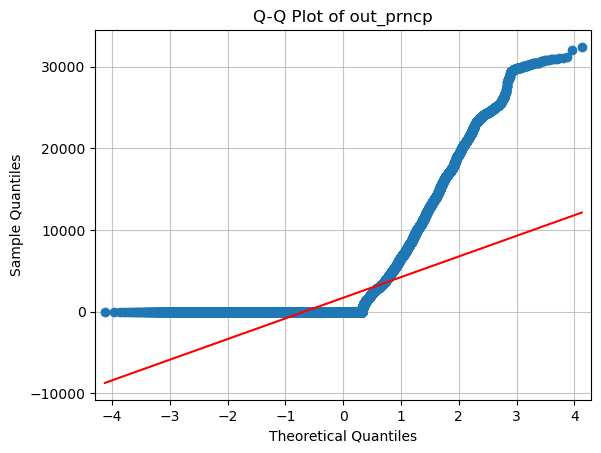

<Figure size 800x600 with 0 Axes>

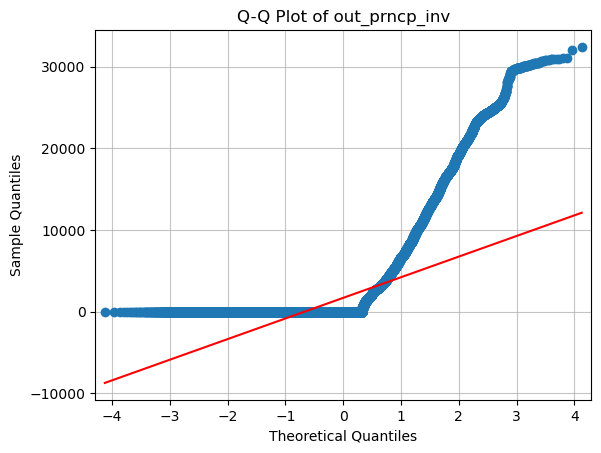

<Figure size 800x600 with 0 Axes>

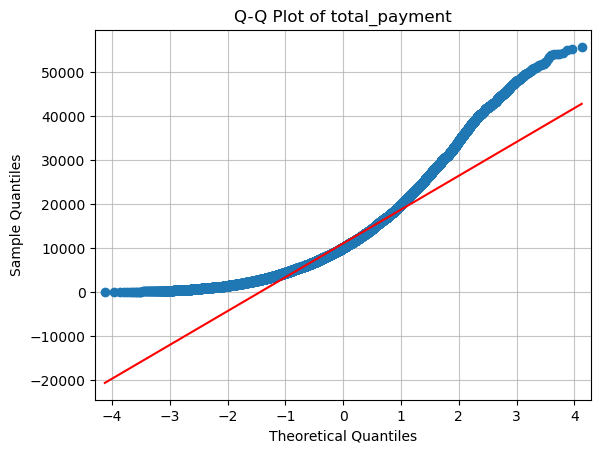

<Figure size 800x600 with 0 Axes>

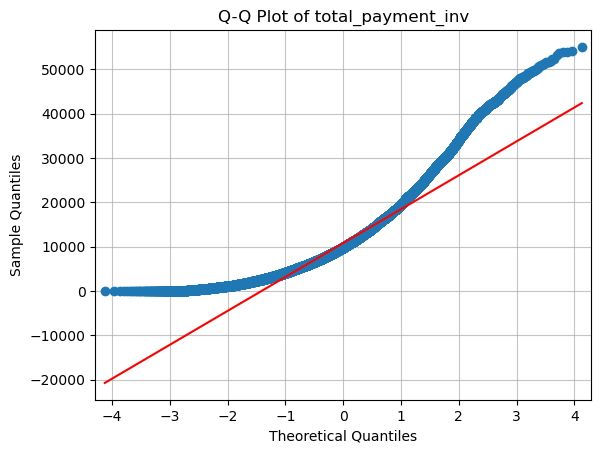

<Figure size 800x600 with 0 Axes>

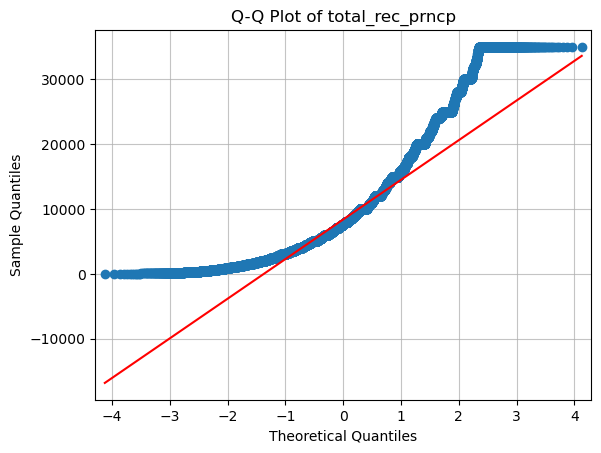

<Figure size 800x600 with 0 Axes>

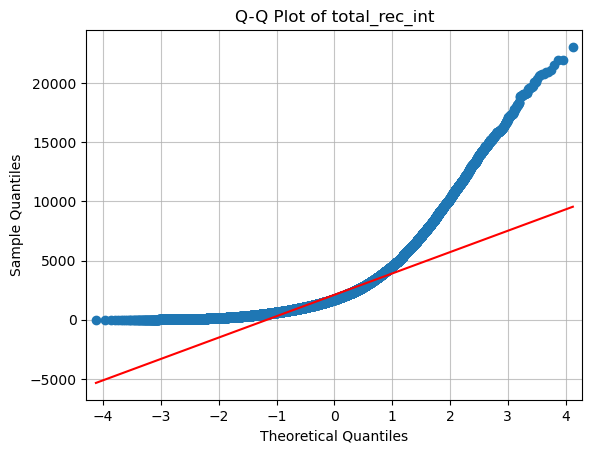

<Figure size 800x600 with 0 Axes>

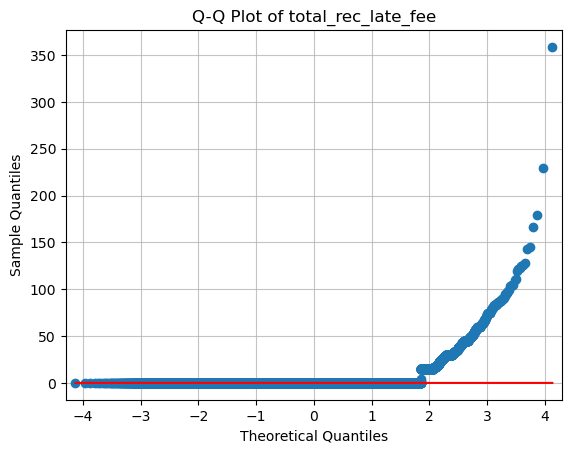

<Figure size 800x600 with 0 Axes>

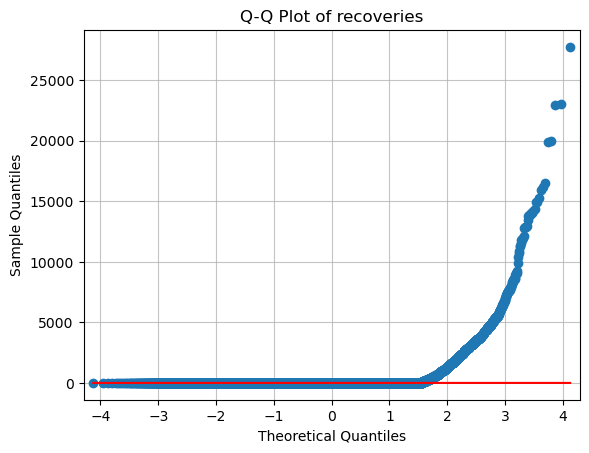

<Figure size 800x600 with 0 Axes>

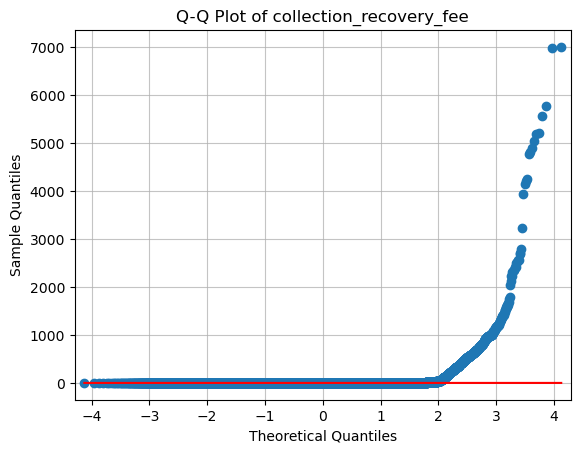

Skipping non-numeric column: last_payment_date


<Figure size 800x600 with 0 Axes>

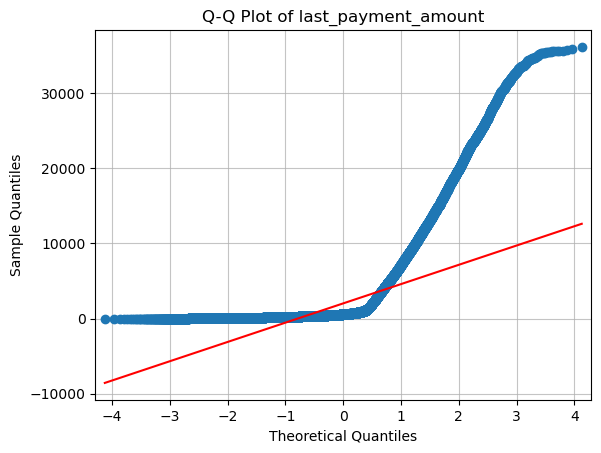

Skipping non-numeric column: last_credit_pull_date


<Figure size 800x600 with 0 Axes>

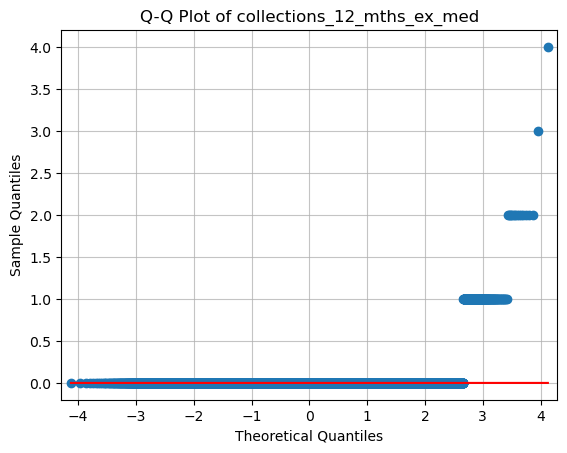

<Figure size 800x600 with 0 Axes>

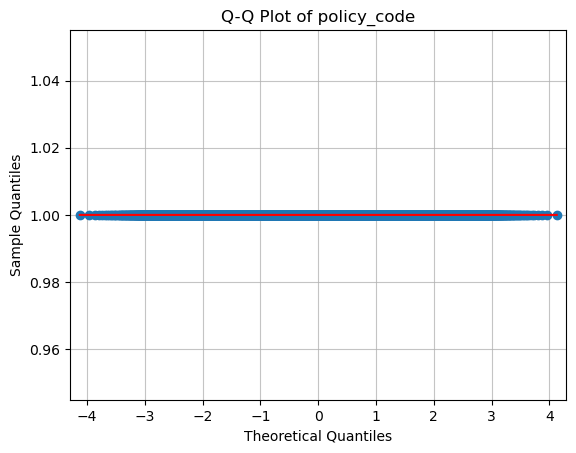

Skipping non-numeric column: application_type


In [ ]:
plot.q_q_plot()

From what we can see most columns have positive skew. Let's apply try different methods of correcting the skew and plots the graphs comparing the results.

In [ ]:
cleaned_data_transform=DataFrameTransform(revised_df)

plot.compare_transformations(cleaned_data_transform.apply_all_transforms())

ValueError: Data must not be constant.